# 라이브러리 로드

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 데이터 로드 및 확인

In [73]:
train = pd.read_csv('train.csv',index_col='ID')
test = pd.read_csv('test.csv', index_col='ID')
submission = pd.read_csv('sample_submission.csv')

In [3]:
train

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
ID,,,,,,,,,,,,,
TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0


In [4]:
test

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
ID,,,,,,,,,,,,
TEST_00000,110,0,210.7,142,35.6,205.9,93,17.43,120.9,111,5.37,2
TEST_00001,283,1,268.5,100,30.3,283.0,92,28.32,290.0,89,8.82,0
TEST_00002,34,1,243.3,205,21.3,225.7,205,29.00,92.6,29,2.44,2
TEST_00003,209,86,83.0,93,24.1,270.6,220,22.89,266.9,81,2.80,6
TEST_00004,202,0,293.2,23,31.0,294.0,24,26.39,223.8,33,6.66,2
...,...,...,...,...,...,...,...,...,...,...,...,...
TEST_12938,322,1,282.4,202,89.9,270.2,321,32.80,293.6,321,8.88,2
TEST_12939,222,0,233.5,209,34.6,234.0,92,23.22,224.4,202,9.63,2
TEST_12940,98,29,223.4,209,29.3,223.9,203,28.82,230.0,208,22.26,2


In [5]:
submission

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0
...,...,...
12938,TEST_12938,0
12939,TEST_12939,0
12940,TEST_12940,0
12941,TEST_12941,0


In [10]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30200 entries, TRAIN_00000 to TRAIN_30199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가입일      30200 non-null  int64  
 1   음성사서함이용  30200 non-null  int64  
 2   주간통화시간   30200 non-null  float64
 3   주간통화횟수   30200 non-null  int64  
 4   주간통화요금   30200 non-null  float64
 5   저녁통화시간   30200 non-null  float64
 6   저녁통화횟수   30200 non-null  int64  
 7   저녁통화요금   30200 non-null  float64
 8   밤통화시간    30200 non-null  float64
 9   밤통화횟수    30200 non-null  int64  
 10  밤통화요금    30200 non-null  float64
 11  상담전화건수   30200 non-null  int64  
 12  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 12943 entries, TEST_00000 to TEST_12942
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가입일      12943 non-null  int64  
 1   음성사서함이용  12943 non-nul

(None, None)

In [9]:
train.isnull().sum(), test.isnull().sum()

(가입일        0
 음성사서함이용    0
 주간통화시간     0
 주간통화횟수     0
 주간통화요금     0
 저녁통화시간     0
 저녁통화횟수     0
 저녁통화요금     0
 밤통화시간      0
 밤통화횟수      0
 밤통화요금      0
 상담전화건수     0
 전화해지여부     0
 dtype: int64,
 가입일        0
 음성사서함이용    0
 주간통화시간     0
 주간통화횟수     0
 주간통화요금     0
 저녁통화시간     0
 저녁통화횟수     0
 저녁통화요금     0
 밤통화시간      0
 밤통화횟수      0
 밤통화요금      0
 상담전화건수     0
 dtype: int64)

In [8]:
train.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


In [11]:
test.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
count,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000
mean,159.776713,12.312756,251.066221,159.761724,40.887059,263.656424,159.628216,25.440460,264.052963,157.692112,12.095035,2.301476
std,118.383432,28.069438,85.236623,103.648878,23.062830,75.232035,103.417132,8.288719,74.877379,101.640429,9.459368,2.058855
min,2.000000,0.000000,0.200000,0.000000,0.100000,0.200000,0.000000,0.000000,21.300000,20.000000,2.000000,0.000000
25%,63.000000,0.000000,222.700000,88.000000,24.400000,223.800000,87.000000,22.220000,223.700000,86.000000,4.880000,2.000000
50%,119.000000,1.000000,234.000000,115.000000,30.800000,242.700000,113.000000,23.300000,242.800000,111.000000,9.060000,2.000000
75%,228.000000,22.000000,289.800000,223.000000,45.900000,290.350000,223.000000,28.820000,290.700000,223.000000,20.290000,2.000000
max,2212.000000,1112.000000,481.800000,489.000000,118.100000,481.500000,490.000000,49.990000,481.700000,489.000000,44.980000,11.000000


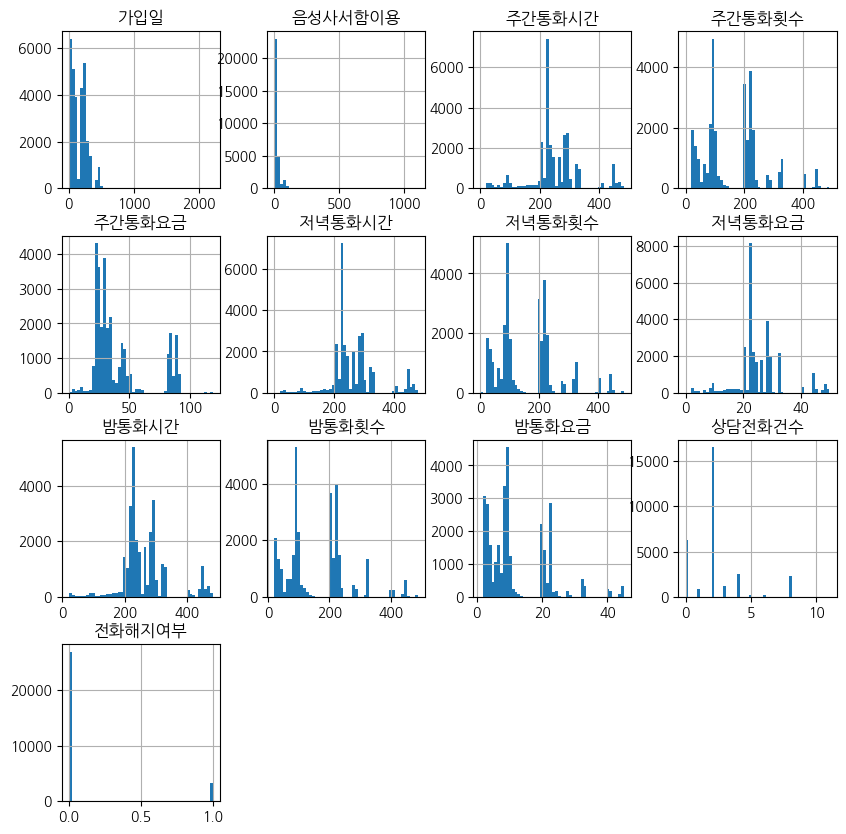

In [12]:
train.hist(bins = 50, figsize = (10,10));

<AxesSubplot:>

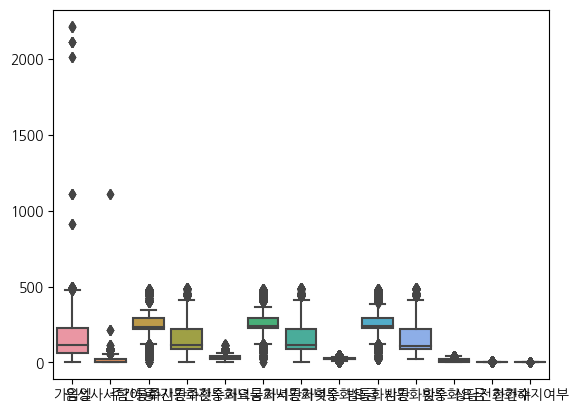

In [13]:
sns.boxplot(train)

# 이상치 제거 및 피처엔지니어링 아이디어

1. 가입일을 구간화 ex) 1달 단위,6개월 단위 -> 의미없는것 같음 -> 그냥 가입일 사용(가입일 로그)
2. 구간화 한 가입일 기준으로 요금 계산 -> 분당 통화요금(단, 통화가 없는 경우 inf값이 나오니 제외 or inf 값을 대체할 값 찾기 (아마 0일듯?))
3. 통화 횟수를 합쳐서 평균 하루 통화 횟수 구하기? (전체통화 횟수 / 가입일) -> 로그변환
4. 통화 시간을 합쳐서 평균 하루 통화 시간 구하기? (전체 통화 시간 / 가입일) -> 로그변환
5. 가입일 / 상담전화 건수 -> 몇일에 한번 상담전화를 했는지 찾기 (의미가있나?) -> 로그변환(의미가 없는것으로 판명)

In [110]:
# 이상치 제거
train = train.loc[train["가입일"] < 700, : ]
train = train.loc[train["음성사서함이용"] < 300, : ]
train

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,...,상담전화건수,전화해지여부,전체통화시간,전체통화횟수,하루평균통화횟수,하루평균통화시간,하루평균통화시간_log,하루평균통화횟수_log,가입일_log,음성사서함이용_log
ID,,,,,,,,,,,,,,,,,,,,,
TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,...,2,0,630.9,489,1.486322,1.917629,1.070771,0.910805,5.799093,0.000000
TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,...,2,0,916.1,858,429.000000,458.050000,6.129159,6.063785,1.098612,4.394449
TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,...,0,0,770.2,973,10.462366,8.281720,2.228047,2.439069,4.543295,3.367296
TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,...,0,0,658.2,518,2.322870,2.951570,1.374113,1.200829,5.411646,0.693147
TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,...,8,0,583.3,514,2.315315,2.627477,1.288537,1.198553,5.407172,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,...,2,0,778.1,590,2.243346,2.958555,1.375879,1.176606,5.575949,4.394449
TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,...,2,0,782.6,685,2.420495,2.765371,1.325846,1.229785,5.648974,4.406719
TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,...,2,0,749.9,160,6.666667,31.245833,3.473389,2.036882,3.218876,0.000000


In [75]:
# 전체통화시간, 전체통화횟수 구하기
train['전체통화시간'] = train['주간통화시간'] + train['저녁통화시간'] + train['밤통화시간']
train['전체통화횟수'] = train['주간통화횟수'] + train['저녁통화횟수'] + train['밤통화횟수']

test['전체통화횟수'] = test['주간통화횟수'] + test['저녁통화횟수'] + test['밤통화횟수']
test['전체통화시간'] = test['주간통화시간'] + test['저녁통화시간'] + test['밤통화시간']

In [76]:
# 하루평균통화횟수
train['하루평균통화횟수'] = train['전체통화횟수']/train['가입일']
test['하루평균통화횟수'] = test['전체통화횟수']/test['가입일']

In [77]:
# 하루평균통화시간
train['하루평균통화시간'] = train['전체통화시간']/train['가입일']
test['하루평균통화시간'] = test['전체통화시간']/test['가입일']

In [78]:
# 로그변환
train[['하루평균통화시간_log', '하루평균통화횟수_log','가입일_log', '음성사서함이용_log']] = np.log1p(train[['하루평균통화시간', '하루평균통화횟수','가입일', '음성사서함이용']])
test[['하루평균통화시간_log', '하루평균통화횟수_log','가입일_log', '음성사서함이용_log']] = np.log1p(test[['하루평균통화시간', '하루평균통화횟수','가입일', '음성사서함이용']])

In [79]:
train

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,...,상담전화건수,전화해지여부,전체통화시간,전체통화횟수,하루평균통화횟수,하루평균통화시간,하루평균통화시간_log,하루평균통화횟수_log,가입일_log,음성사서함이용_log
ID,,,,,,,,,,,,,,,,,,,,,
TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,...,2,0,630.9,489,1.486322,1.917629,1.070771,0.910805,5.799093,0.000000
TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,...,2,0,916.1,858,429.000000,458.050000,6.129159,6.063785,1.098612,4.394449
TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,...,0,0,770.2,973,10.462366,8.281720,2.228047,2.439069,4.543295,3.367296
TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,...,0,0,658.2,518,2.322870,2.951570,1.374113,1.200829,5.411646,0.693147
TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,...,8,0,583.3,514,2.315315,2.627477,1.288537,1.198553,5.407172,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,...,2,0,778.1,590,2.243346,2.958555,1.375879,1.176606,5.575949,4.394449
TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,...,2,0,782.6,685,2.420495,2.765371,1.325846,1.229785,5.648974,4.406719
TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,...,2,0,749.9,160,6.666667,31.245833,3.473389,2.036882,3.218876,0.000000


In [80]:
test

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전체통화횟수,전체통화시간,하루평균통화횟수,하루평균통화시간,하루평균통화시간_log,하루평균통화횟수_log,가입일_log,음성사서함이용_log
ID,,,,,,,,,,,,,,,,,,,,
TEST_00000,110,0,210.7,142,35.6,205.9,93,17.43,120.9,111,5.37,2,346,537.5,3.145455,4.886364,1.772638,1.422012,4.709530,0.000000
TEST_00001,283,1,268.5,100,30.3,283.0,92,28.32,290.0,89,8.82,0,281,841.5,0.992933,2.973498,1.379647,0.689607,5.648974,0.693147
TEST_00002,34,1,243.3,205,21.3,225.7,205,29.00,92.6,29,2.44,2,439,561.6,12.911765,16.517647,2.863209,2.632735,3.555348,0.693147
TEST_00003,209,86,83.0,93,24.1,270.6,220,22.89,266.9,81,2.80,6,394,620.5,1.885167,2.968900,1.378489,1.059583,5.347108,4.465908
TEST_00004,202,0,293.2,23,31.0,294.0,24,26.39,223.8,33,6.66,2,80,811.0,0.396040,4.014851,1.612404,0.333639,5.313206,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEST_12938,322,1,282.4,202,89.9,270.2,321,32.80,293.6,321,8.88,2,844,846.2,2.621118,2.627950,1.288668,1.286783,5.777652,0.693147
TEST_12939,222,0,233.5,209,34.6,234.0,92,23.22,224.4,202,9.63,2,503,691.9,2.265766,3.116667,1.415044,1.183494,5.407172,0.000000
TEST_12940,98,29,223.4,209,29.3,223.9,203,28.82,230.0,208,22.26,2,620,677.3,6.326531,6.911224,2.068283,1.991502,4.595120,3.401197


# 피처,라벨 설정

In [81]:
label_name = '전화해지여부'
label_name

'전화해지여부'

In [82]:
feature_names = train.columns.tolist()
feature_names.remove(label_name)
feature_names.remove("음성사서함이용")
feature_names.remove("음성사서함이용_log")
feature_names.remove("가입일")
feature_names.remove("전체통화시간")
feature_names.remove("전체통화횟수")
feature_names.remove("하루평균통화시간")
feature_names.remove("하루평균통화횟수")
feature_names

['주간통화시간',
 '주간통화횟수',
 '주간통화요금',
 '저녁통화시간',
 '저녁통화횟수',
 '저녁통화요금',
 '밤통화시간',
 '밤통화횟수',
 '밤통화요금',
 '상담전화건수',
 '하루평균통화시간_log',
 '하루평균통화횟수_log',
 '가입일_log']

In [83]:
X = train[feature_names]
y = train[label_name]

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                    test_size=0.2, stratify=y, random_state= 42 )

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((24134, 13), (6034, 13), (24134,), (6034,))

# DecisionTreeClassifier

In [85]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(random_state = 42)
model_dtc

DecisionTreeClassifier(random_state=42)

In [86]:
model_dtc.fit(X_train, y_train)
y_predict_dtc = model_dtc.predict(X_valid)
y_predict_dtc[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [87]:
from sklearn.metrics import f1_score
f1_score(y_predict_dtc, y_valid, average='macro')

0.7058673011174681

# ExtraTreesClassifier

In [31]:
from sklearn.ensemble import ExtraTreesClassifier

model_etc = ExtraTreesClassifier(random_state=42)
model_etc

ExtraTreesClassifier(random_state=42)

In [33]:
model_etc.fit(X_train,y_train)
y_predict_etc = model_etc.predict(X_valid)
y_predict_etc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
from sklearn.metrics import f1_score
f1_score(y_predict_etc, y_valid, average='macro')

0.7805101900908492

#  RandomForestClassifier / RandomizedSearchCV

In [88]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(random_state = 42)
model_rfc

RandomForestClassifier(random_state=42)

In [89]:
parameters = {"n_estimators" : (50,100,150,200), 
              'max_depth' : (3,5,7,9),
              "min_samples_split" : (2,3,4),
              'min_samples_leaf' : (2,3,4)}
parameters

{'n_estimators': (50, 100, 150, 200),
 'max_depth': (3, 5, 7, 9),
 'min_samples_split': (2, 3, 4),
 'min_samples_leaf': (2, 3, 4)}

In [90]:
from sklearn.model_selection import RandomizedSearchCV

reg = RandomizedSearchCV(model_rfc, parameters, n_jobs=-1, n_iter = 10, cv=5, verbose=2, 
                   scoring="neg_root_mean_squared_error")
reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': (3, 5, 7, 9),
                                        'min_samples_leaf': (2, 3, 4),
                                        'min_samples_split': (2, 3, 4),
                                        'n_estimators': (50, 100, 150, 200)},
                   scoring='neg_root_mean_squared_error', verbose=2)

In [91]:
pd.DataFrame(reg.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.192796,0.303198,0.265802,0.056181,150,4,3,9,"{'n_estimators': 150, 'min_samples_split': 4, ...",-0.329164,-0.329164,-0.330734,-0.331047,-0.330454,-0.330113,0.000797,1
1,5.941197,0.123916,0.138802,0.024844,200,2,2,9,"{'n_estimators': 200, 'min_samples_split': 2, ...",-0.329164,-0.329793,-0.329793,-0.331047,-0.331081,-0.330175,0.000761,2
8,1.081597,0.026086,0.025998,0.000893,50,3,2,7,"{'n_estimators': 50, 'min_samples_split': 3, '...",-0.329793,-0.330107,-0.331359,-0.331359,-0.330768,-0.330677,0.000640,3
5,2.153599,0.094332,0.048999,0.001415,100,4,4,7,"{'n_estimators': 100, 'min_samples_split': 4, ...",-0.330420,-0.330420,-0.331672,-0.331359,-0.331081,-0.330991,0.000502,4
6,4.173199,0.025695,0.104402,0.008892,200,4,4,7,"{'n_estimators': 200, 'min_samples_split': 4, ...",-0.330734,-0.330420,-0.331672,-0.331672,-0.331394,-0.331178,0.000511,5
2,1.272996,0.218152,0.050601,0.012955,100,3,4,3,"{'n_estimators': 100, 'min_samples_split': 3, ...",-0.331359,-0.331359,-0.331672,-0.331672,-0.331394,-0.331491,0.000148,6
3,0.598600,0.075022,0.020198,0.001469,50,4,4,3,"{'n_estimators': 50, 'min_samples_split': 4, '...",-0.331359,-0.331359,-0.331672,-0.331672,-0.331394,-0.331491,0.000148,6
4,0.951795,0.107289,0.031802,0.008134,50,2,2,5,"{'n_estimators': 50, 'min_samples_split': 2, '...",-0.331359,-0.331359,-0.331672,-0.331672,-0.331394,-0.331491,0.000148,6
7,2.397597,0.039704,0.063802,0.003185,150,3,3,5,"{'n_estimators': 150, 'min_samples_split': 3, ...",-0.331359,-0.331359,-0.331672,-0.331672,-0.331394,-0.331491,0.000148,6
9,0.842196,0.042363,0.022200,0.000399,50,4,4,5,"{'n_estimators': 50, 'min_samples_split': 4, '...",-0.331359,-0.331359,-0.331672,-0.331672,-0.331394,-0.331491,0.000148,6


In [92]:
best = reg.best_estimator_

In [93]:
best.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=4,
                       n_estimators=150, random_state=42)

In [94]:
y_predict_rfc = best.predict(X_valid)

In [95]:
from sklearn.metrics import f1_score
f1_score(y_predict_rfc, y_valid, average='macro')

0.48469857844857844

# lightgbm

In [96]:
import lightgbm 

model_lgbm = lightgbm.LGBMClassifier(objective = "binary", random_state=42)
model_lgbm

LGBMClassifier(objective='binary', random_state=42)

In [97]:
model_lgbm.fit(X_train, y_train)

LGBMClassifier(objective='binary', random_state=42)

In [98]:
y_predict_lgbm = model_lgbm.predict(X_valid)
y_predict_lgbm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
from sklearn.metrics import f1_score
f1_score(y_predict_lgbm, y_valid, average='macro')

0.5596015759339393

# catboost

In [100]:
import catboost

model_cb = catboost.CatBoostClassifier(eval_metric = 'F1')
model_cb

In [101]:
from scipy.stats import randint
from sklearn.utils.fixes import loguniform

param_grid = {
    'n_estimators': (100,200,300,400,500,600,700,800,900),
    'depth': (None,10,20,30,40,50,60,70,80,90,100),
    'learning_rate': (0.1,0.15,0.2,0.25,0.3),
    'min_child_samples': (30,35,40,45,50)
}

param_grid

{'n_estimators': (100, 200, 300, 400, 500, 600, 700, 800, 900),
 'depth': (None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100),
 'learning_rate': (0.1, 0.15, 0.2, 0.25, 0.3),
 'min_child_samples': (30, 35, 40, 45, 50)}

In [103]:
result = model_cb.randomized_search(param_grid, X_train, y_train, cv = 5 , n_iter = 50, verbose = False)
result

0:	learn: 0.0143403	test: 0.0102215	best: 0.0102215 (0)	total: 60ms	remaining: 11.9s
1:	learn: 0.0086538	test: 0.0000000	best: 0.0102215 (0)	total: 123ms	remaining: 12.2s
2:	learn: 0.0143816	test: 0.0068493	best: 0.0102215 (0)	total: 181ms	remaining: 11.9s
3:	learn: 0.0115218	test: 0.0068611	best: 0.0102215 (0)	total: 238ms	remaining: 11.7s
4:	learn: 0.0153330	test: 0.0102740	best: 0.0102740 (4)	total: 303ms	remaining: 11.8s
5:	learn: 0.0153330	test: 0.0102740	best: 0.0102740 (4)	total: 362ms	remaining: 11.7s
6:	learn: 0.0210225	test: 0.0136752	best: 0.0136752 (6)	total: 368ms	remaining: 10.2s
7:	learn: 0.0219675	test: 0.0136752	best: 0.0136752 (6)	total: 426ms	remaining: 10.2s
8:	learn: 0.0360190	test: 0.0204082	best: 0.0204082 (8)	total: 494ms	remaining: 10.5s
9:	learn: 0.0572233	test: 0.0204082	best: 0.0204082 (8)	total: 567ms	remaining: 10.8s
10:	learn: 0.0742804	test: 0.0404040	best: 0.0404040 (10)	total: 657ms	remaining: 11.3s
11:	learn: 0.0831025	test: 0.0369748	best: 0.0404040 

96:	learn: 0.8676041	test: 0.4191617	best: 0.4253286 (95)	total: 6.27s	remaining: 6.66s
97:	learn: 0.8715645	test: 0.4258373	best: 0.4258373 (97)	total: 6.33s	remaining: 6.59s
98:	learn: 0.8750000	test: 0.4239521	best: 0.4258373 (97)	total: 6.39s	remaining: 6.52s
99:	learn: 0.8770449	test: 0.4272076	best: 0.4272076 (99)	total: 6.46s	remaining: 6.46s
100:	learn: 0.8780616	test: 0.4266985	best: 0.4272076 (99)	total: 6.53s	remaining: 6.39s
101:	learn: 0.8816584	test: 0.4261905	best: 0.4272076 (99)	total: 6.59s	remaining: 6.33s
102:	learn: 0.8843040	test: 0.4307692	best: 0.4307692 (102)	total: 6.65s	remaining: 6.26s
103:	learn: 0.8881955	test: 0.4339623	best: 0.4339623 (103)	total: 6.72s	remaining: 6.2s
104:	learn: 0.8881955	test: 0.4347826	best: 0.4347826 (104)	total: 6.79s	remaining: 6.15s
105:	learn: 0.8916537	test: 0.4305882	best: 0.4347826 (104)	total: 6.85s	remaining: 6.08s
106:	learn: 0.8950362	test: 0.4381625	best: 0.4381625 (106)	total: 6.91s	remaining: 6.01s
107:	learn: 0.8980119

189:	learn: 0.9769833	test: 0.4798206	best: 0.4819820 (186)	total: 12.1s	remaining: 639ms
190:	learn: 0.9772338	test: 0.4803591	best: 0.4819820 (186)	total: 12.2s	remaining: 575ms
191:	learn: 0.9777452	test: 0.4723164	best: 0.4819820 (186)	total: 12.3s	remaining: 512ms
192:	learn: 0.9777452	test: 0.4728507	best: 0.4819820 (186)	total: 12.4s	remaining: 448ms
193:	learn: 0.9779951	test: 0.4762980	best: 0.4819820 (186)	total: 12.4s	remaining: 384ms
194:	learn: 0.9779843	test: 0.4768362	best: 0.4819820 (186)	total: 12.5s	remaining: 320ms
195:	learn: 0.9779951	test: 0.4773756	best: 0.4819820 (186)	total: 12.5s	remaining: 256ms
196:	learn: 0.9784525	test: 0.4785553	best: 0.4819820 (186)	total: 12.6s	remaining: 192ms
197:	learn: 0.9789525	test: 0.4796380	best: 0.4819820 (186)	total: 12.7s	remaining: 128ms
198:	learn: 0.9799413	test: 0.4801812	best: 0.4819820 (186)	total: 12.7s	remaining: 63.9ms
199:	learn: 0.9814181	test: 0.4841629	best: 0.4841629 (199)	total: 12.8s	remaining: 0us

bestTest =

82:	learn: 0.8331065	test: 0.3935644	best: 0.3945746 (81)	total: 5.13s	remaining: 25.8s
83:	learn: 0.8405091	test: 0.3906057	best: 0.3945746 (81)	total: 5.19s	remaining: 25.7s
84:	learn: 0.8388497	test: 0.3910891	best: 0.3945746 (81)	total: 5.24s	remaining: 25.6s
85:	learn: 0.8407367	test: 0.3935644	best: 0.3945746 (81)	total: 5.3s	remaining: 25.5s
86:	learn: 0.8425325	test: 0.3950617	best: 0.3950617 (86)	total: 5.36s	remaining: 25.4s
87:	learn: 0.8434712	test: 0.3970407	best: 0.3970407 (87)	total: 5.42s	remaining: 25.4s
88:	learn: 0.8454276	test: 0.3926380	best: 0.3970407 (87)	total: 5.48s	remaining: 25.3s
89:	learn: 0.8504572	test: 0.3956044	best: 0.3970407 (87)	total: 5.54s	remaining: 25.2s
90:	learn: 0.8532332	test: 0.4111245	best: 0.4111245 (90)	total: 5.6s	remaining: 25.2s
91:	learn: 0.8535408	test: 0.4067797	best: 0.4111245 (90)	total: 5.66s	remaining: 25.1s
92:	learn: 0.8596585	test: 0.4135429	best: 0.4135429 (92)	total: 5.71s	remaining: 25s
93:	learn: 0.8630683	test: 0.4220624

175:	learn: 0.9712319	test: 0.4711212	best: 0.4750000 (149)	total: 11.4s	remaining: 21s
176:	learn: 0.9714848	test: 0.4733862	best: 0.4750000 (149)	total: 11.5s	remaining: 21s
177:	learn: 0.9719902	test: 0.4739229	best: 0.4750000 (149)	total: 11.6s	remaining: 21s
178:	learn: 0.9714848	test: 0.4721907	best: 0.4750000 (149)	total: 11.7s	remaining: 20.9s
179:	learn: 0.9717514	test: 0.4761905	best: 0.4761905 (179)	total: 11.7s	remaining: 20.8s
180:	learn: 0.9714988	test: 0.4739229	best: 0.4761905 (179)	total: 11.8s	remaining: 20.8s
181:	learn: 0.9714988	test: 0.4744608	best: 0.4761905 (179)	total: 11.8s	remaining: 20.7s
182:	learn: 0.9722290	test: 0.4768362	best: 0.4768362 (182)	total: 11.9s	remaining: 20.7s
183:	learn: 0.9722290	test: 0.4773756	best: 0.4773756 (183)	total: 12s	remaining: 20.6s
184:	learn: 0.9737294	test: 0.4784580	best: 0.4784580 (184)	total: 12.1s	remaining: 20.5s
185:	learn: 0.9752633	test: 0.4802706	best: 0.4802706 (185)	total: 12.2s	remaining: 20.5s
186:	learn: 0.9759

267:	learn: 0.9968561	test: 0.4872080	best: 0.4966592 (232)	total: 19.2s	remaining: 16.6s
268:	learn: 0.9968561	test: 0.4866667	best: 0.4966592 (232)	total: 19.3s	remaining: 16.5s
269:	learn: 0.9968561	test: 0.4888889	best: 0.4966592 (232)	total: 19.3s	remaining: 16.5s
270:	learn: 0.9966134	test: 0.4888889	best: 0.4966592 (232)	total: 19.4s	remaining: 16.4s
271:	learn: 0.9975834	test: 0.4866667	best: 0.4966592 (232)	total: 19.5s	remaining: 16.3s
272:	learn: 0.9975822	test: 0.4905660	best: 0.4966592 (232)	total: 19.5s	remaining: 16.2s
273:	learn: 0.9978256	test: 0.4905660	best: 0.4966592 (232)	total: 19.6s	remaining: 16.2s
274:	learn: 0.9973411	test: 0.4900222	best: 0.4966592 (232)	total: 19.7s	remaining: 16.1s
275:	learn: 0.9973411	test: 0.4900222	best: 0.4966592 (232)	total: 19.7s	remaining: 16s
276:	learn: 0.9978245	test: 0.4883463	best: 0.4966592 (232)	total: 19.8s	remaining: 15.9s
277:	learn: 0.9978245	test: 0.4894795	best: 0.4966592 (232)	total: 19.9s	remaining: 15.9s
278:	learn: 

361:	learn: 0.9997586	test: 0.5005513	best: 0.5044053 (359)	total: 26s	remaining: 9.91s
362:	learn: 0.9997586	test: 0.5038504	best: 0.5044053 (359)	total: 26.1s	remaining: 9.84s
363:	learn: 0.9997586	test: 0.5022026	best: 0.5044053 (359)	total: 26.1s	remaining: 9.77s
364:	learn: 0.9997586	test: 0.5087719	best: 0.5087719 (364)	total: 26.2s	remaining: 9.69s
365:	learn: 0.9997586	test: 0.5087719	best: 0.5087719 (364)	total: 26.3s	remaining: 9.62s
366:	learn: 0.9997586	test: 0.5087719	best: 0.5087719 (364)	total: 26.3s	remaining: 9.55s
367:	learn: 0.9997586	test: 0.5071350	best: 0.5087719 (364)	total: 26.4s	remaining: 9.47s
368:	learn: 0.9997586	test: 0.5071350	best: 0.5087719 (364)	total: 26.5s	remaining: 9.4s
369:	learn: 0.9997586	test: 0.5087719	best: 0.5087719 (364)	total: 26.6s	remaining: 9.33s
370:	learn: 0.9997586	test: 0.5087719	best: 0.5087719 (364)	total: 26.6s	remaining: 9.26s
371:	learn: 0.9997586	test: 0.5087719	best: 0.5087719 (364)	total: 26.7s	remaining: 9.2s
372:	learn: 0.

455:	learn: 1.0000000	test: 0.5076586	best: 0.5120350 (384)	total: 33s	remaining: 3.19s
456:	learn: 1.0000000	test: 0.5076586	best: 0.5120350 (384)	total: 33.1s	remaining: 3.11s
457:	learn: 1.0000000	test: 0.5071038	best: 0.5120350 (384)	total: 33.2s	remaining: 3.04s
458:	learn: 1.0000000	test: 0.5071038	best: 0.5120350 (384)	total: 33.2s	remaining: 2.97s
459:	learn: 1.0000000	test: 0.5076586	best: 0.5120350 (384)	total: 33.3s	remaining: 2.9s
460:	learn: 1.0000000	test: 0.5076586	best: 0.5120350 (384)	total: 33.4s	remaining: 2.82s
461:	learn: 1.0000000	test: 0.5119826	best: 0.5120350 (384)	total: 33.4s	remaining: 2.75s
462:	learn: 1.0000000	test: 0.5103599	best: 0.5120350 (384)	total: 33.5s	remaining: 2.68s
463:	learn: 1.0000000	test: 0.5109170	best: 0.5120350 (384)	total: 33.6s	remaining: 2.6s
464:	learn: 1.0000000	test: 0.5109170	best: 0.5120350 (384)	total: 33.6s	remaining: 2.53s
465:	learn: 1.0000000	test: 0.5081788	best: 0.5120350 (384)	total: 33.7s	remaining: 2.46s
466:	learn: 1.

48:	learn: 0.3282626	test: 0.1481481	best: 0.1481481 (47)	total: 3.42s	remaining: 24.5s
49:	learn: 0.3349282	test: 0.1481481	best: 0.1481481 (47)	total: 3.49s	remaining: 24.4s
50:	learn: 0.3453465	test: 0.1538462	best: 0.1538462 (50)	total: 3.55s	remaining: 24.3s
51:	learn: 0.3551181	test: 0.1536098	best: 0.1538462 (50)	total: 3.63s	remaining: 24.3s
52:	learn: 0.3620690	test: 0.1564417	best: 0.1564417 (52)	total: 3.69s	remaining: 24.2s
53:	learn: 0.3639922	test: 0.1620795	best: 0.1620795 (53)	total: 3.75s	remaining: 24.1s
54:	learn: 0.3684621	test: 0.1648855	best: 0.1648855 (54)	total: 3.81s	remaining: 23.9s
55:	learn: 0.3785881	test: 0.1676829	best: 0.1676829 (55)	total: 3.87s	remaining: 23.8s
56:	learn: 0.3817267	test: 0.1674277	best: 0.1676829 (55)	total: 3.94s	remaining: 23.7s
57:	learn: 0.3889103	test: 0.1754917	best: 0.1754917 (57)	total: 4s	remaining: 23.6s
58:	learn: 0.3996943	test: 0.1702128	best: 0.1754917 (57)	total: 4.09s	remaining: 23.6s
59:	learn: 0.4053333	test: 0.175491

144:	learn: 0.8536913	test: 0.4034653	best: 0.4034653 (144)	total: 10.7s	remaining: 18.8s
145:	learn: 0.8539989	test: 0.4014870	best: 0.4034653 (144)	total: 10.8s	remaining: 18.7s
146:	learn: 0.8556121	test: 0.4009901	best: 0.4034653 (144)	total: 10.8s	remaining: 18.7s
147:	learn: 0.8570665	test: 0.3980222	best: 0.4034653 (144)	total: 10.9s	remaining: 18.6s
148:	learn: 0.8603412	test: 0.4029666	best: 0.4034653 (144)	total: 11s	remaining: 18.5s
149:	learn: 0.8613333	test: 0.3990087	best: 0.4034653 (144)	total: 11s	remaining: 18.4s
150:	learn: 0.8631523	test: 0.4004944	best: 0.4034653 (144)	total: 11.1s	remaining: 18.3s
151:	learn: 0.8662420	test: 0.4039409	best: 0.4039409 (151)	total: 11.1s	remaining: 18.2s
152:	learn: 0.8688960	test: 0.4034440	best: 0.4039409 (151)	total: 11.2s	remaining: 18.1s
153:	learn: 0.8699338	test: 0.4126984	best: 0.4126984 (153)	total: 11.3s	remaining: 18s
154:	learn: 0.8703949	test: 0.4107579	best: 0.4126984 (153)	total: 11.3s	remaining: 17.9s
155:	learn: 0.87

237:	learn: 0.9476831	test: 0.4597433	best: 0.4626168 (232)	total: 17.2s	remaining: 11.7s
238:	learn: 0.9484433	test: 0.4592075	best: 0.4626168 (232)	total: 17.3s	remaining: 11.6s
239:	learn: 0.9491779	test: 0.4663573	best: 0.4663573 (239)	total: 17.3s	remaining: 11.6s
240:	learn: 0.9499627	test: 0.4663573	best: 0.4663573 (239)	total: 17.4s	remaining: 11.5s
241:	learn: 0.9507218	test: 0.4663573	best: 0.4663573 (239)	total: 17.5s	remaining: 11.4s
242:	learn: 0.9504605	test: 0.4681344	best: 0.4681344 (242)	total: 17.5s	remaining: 11.3s
243:	learn: 0.9504605	test: 0.4663573	best: 0.4681344 (242)	total: 17.6s	remaining: 11.3s
244:	learn: 0.9506972	test: 0.4699074	best: 0.4699074 (244)	total: 17.7s	remaining: 11.2s
245:	learn: 0.9512680	test: 0.4681344	best: 0.4699074 (244)	total: 17.7s	remaining: 11.1s
246:	learn: 0.9530435	test: 0.4692218	best: 0.4699074 (244)	total: 17.8s	remaining: 11s
247:	learn: 0.9535404	test: 0.4686775	best: 0.4699074 (244)	total: 17.8s	remaining: 10.9s
248:	learn: 

331:	learn: 0.9839260	test: 0.4818182	best: 0.4886878 (322)	total: 23.3s	remaining: 4.76s
332:	learn: 0.9834469	test: 0.4800910	best: 0.4886878 (322)	total: 23.3s	remaining: 4.69s
333:	learn: 0.9844282	test: 0.4852608	best: 0.4886878 (322)	total: 23.4s	remaining: 4.62s
334:	learn: 0.9844282	test: 0.4852608	best: 0.4886878 (322)	total: 23.5s	remaining: 4.55s
335:	learn: 0.9844282	test: 0.4829932	best: 0.4886878 (322)	total: 23.5s	remaining: 4.48s
336:	learn: 0.9851690	test: 0.4818182	best: 0.4886878 (322)	total: 23.6s	remaining: 4.41s
337:	learn: 0.9851618	test: 0.4823663	best: 0.4886878 (322)	total: 23.7s	remaining: 4.34s
338:	learn: 0.9856483	test: 0.4829932	best: 0.4886878 (322)	total: 23.8s	remaining: 4.28s
339:	learn: 0.9856483	test: 0.4829932	best: 0.4886878 (322)	total: 23.8s	remaining: 4.21s
340:	learn: 0.9856483	test: 0.4824462	best: 0.4886878 (322)	total: 23.9s	remaining: 4.14s
341:	learn: 0.9856552	test: 0.4824462	best: 0.4886878 (322)	total: 24s	remaining: 4.07s
342:	learn: 

23:	learn: 0.3645550	test: 0.1366460	best: 0.1399689 (22)	total: 2.18s	remaining: 1m 1s
24:	learn: 0.3703131	test: 0.1331269	best: 0.1399689 (22)	total: 2.26s	remaining: 1m
25:	learn: 0.3922018	test: 0.1329212	best: 0.1399689 (22)	total: 2.34s	remaining: 1m
26:	learn: 0.4153499	test: 0.1437309	best: 0.1437309 (26)	total: 2.42s	remaining: 1m
27:	learn: 0.4256908	test: 0.1547800	best: 0.1547800 (27)	total: 2.49s	remaining: 59.8s
28:	learn: 0.4243556	test: 0.1575758	best: 0.1575758 (28)	total: 2.57s	remaining: 59.6s
29:	learn: 0.4380318	test: 0.1659125	best: 0.1659125 (29)	total: 2.66s	remaining: 59.3s
30:	learn: 0.4586219	test: 0.1741742	best: 0.1741742 (30)	total: 2.74s	remaining: 59.1s
31:	learn: 0.4853257	test: 0.1763827	best: 0.1763827 (31)	total: 2.81s	remaining: 58.7s
32:	learn: 0.4923515	test: 0.1872214	best: 0.1872214 (32)	total: 2.88s	remaining: 58.3s
33:	learn: 0.5014144	test: 0.1845238	best: 0.1872214 (32)	total: 2.96s	remaining: 58.1s
34:	learn: 0.5093211	test: 0.1845238	best

119:	learn: 0.9519088	test: 0.4641638	best: 0.4641638 (119)	total: 9.33s	remaining: 45.1s
120:	learn: 0.9532525	test: 0.4601367	best: 0.4641638 (119)	total: 9.39s	remaining: 44.9s
121:	learn: 0.9537472	test: 0.4613636	best: 0.4641638 (119)	total: 9.46s	remaining: 44.8s
122:	learn: 0.9540514	test: 0.4638009	best: 0.4641638 (119)	total: 9.54s	remaining: 44.8s
123:	learn: 0.9540287	test: 0.4643262	best: 0.4643262 (123)	total: 9.61s	remaining: 44.6s
124:	learn: 0.9571006	test: 0.4672686	best: 0.4672686 (124)	total: 9.68s	remaining: 44.5s
125:	learn: 0.9588974	test: 0.4650113	best: 0.4672686 (124)	total: 9.75s	remaining: 44.4s
126:	learn: 0.9593896	test: 0.4643262	best: 0.4672686 (124)	total: 9.83s	remaining: 44.4s
127:	learn: 0.9619258	test: 0.4638009	best: 0.4672686 (124)	total: 9.91s	remaining: 44.3s
128:	learn: 0.9626719	test: 0.4653802	best: 0.4672686 (124)	total: 10s	remaining: 44.3s
129:	learn: 0.9629084	test: 0.4676504	best: 0.4676504 (129)	total: 10.1s	remaining: 44.1s
130:	learn: 

211:	learn: 0.9941860	test: 0.4911111	best: 0.4938821 (205)	total: 16.2s	remaining: 37.3s
212:	learn: 0.9941860	test: 0.4911111	best: 0.4938821 (205)	total: 16.3s	remaining: 37.2s
213:	learn: 0.9941860	test: 0.4927858	best: 0.4938821 (205)	total: 16.4s	remaining: 37.2s
214:	learn: 0.9941832	test: 0.4961240	best: 0.4961240 (214)	total: 16.4s	remaining: 37.1s
215:	learn: 0.9946705	test: 0.4955752	best: 0.4961240 (214)	total: 16.5s	remaining: 37s
216:	learn: 0.9953984	test: 0.4988962	best: 0.4988962 (216)	total: 16.6s	remaining: 37s
217:	learn: 0.9958828	test: 0.4988962	best: 0.4988962 (216)	total: 16.7s	remaining: 36.9s
218:	learn: 0.9954006	test: 0.4972376	best: 0.4988962 (216)	total: 16.8s	remaining: 36.8s
219:	learn: 0.9954006	test: 0.5000000	best: 0.5000000 (219)	total: 16.8s	remaining: 36.8s
220:	learn: 0.9953984	test: 0.4972376	best: 0.5000000 (219)	total: 16.9s	remaining: 36.7s
221:	learn: 0.9956416	test: 0.4966887	best: 0.5000000 (219)	total: 17s	remaining: 36.6s
222:	learn: 0.99

305:	learn: 0.9997586	test: 0.4983462	best: 0.5038504 (255)	total: 23.5s	remaining: 30.2s
306:	learn: 0.9997586	test: 0.4966887	best: 0.5038504 (255)	total: 23.5s	remaining: 30.1s
307:	learn: 1.0000000	test: 0.4961411	best: 0.5038504 (255)	total: 23.6s	remaining: 30.1s
308:	learn: 1.0000000	test: 0.4961411	best: 0.5038504 (255)	total: 23.7s	remaining: 30s
309:	learn: 1.0000000	test: 0.4950276	best: 0.5038504 (255)	total: 23.8s	remaining: 29.9s
310:	learn: 1.0000000	test: 0.4950276	best: 0.5038504 (255)	total: 23.8s	remaining: 29.8s
311:	learn: 1.0000000	test: 0.4950276	best: 0.5038504 (255)	total: 23.9s	remaining: 29.7s
312:	learn: 1.0000000	test: 0.5016502	best: 0.5038504 (255)	total: 24s	remaining: 29.6s
313:	learn: 1.0000000	test: 0.5010989	best: 0.5038504 (255)	total: 24s	remaining: 29.5s
314:	learn: 1.0000000	test: 0.5010989	best: 0.5038504 (255)	total: 24.1s	remaining: 29.5s
315:	learn: 1.0000000	test: 0.5010989	best: 0.5038504 (255)	total: 24.2s	remaining: 29.4s
316:	learn: 1.00

400:	learn: 1.0000000	test: 0.5129870	best: 0.5189189 (392)	total: 29.5s	remaining: 22s
401:	learn: 1.0000000	test: 0.5161987	best: 0.5189189 (392)	total: 29.6s	remaining: 21.9s
402:	learn: 1.0000000	test: 0.5167568	best: 0.5189189 (392)	total: 29.7s	remaining: 21.9s
403:	learn: 1.0000000	test: 0.5151515	best: 0.5189189 (392)	total: 29.7s	remaining: 21.8s
404:	learn: 1.0000000	test: 0.5151515	best: 0.5189189 (392)	total: 29.8s	remaining: 21.7s
405:	learn: 1.0000000	test: 0.5167568	best: 0.5189189 (392)	total: 29.9s	remaining: 21.6s
406:	learn: 1.0000000	test: 0.5140389	best: 0.5189189 (392)	total: 29.9s	remaining: 21.6s
407:	learn: 1.0000000	test: 0.5161987	best: 0.5189189 (392)	total: 30s	remaining: 21.5s
408:	learn: 1.0000000	test: 0.5157096	best: 0.5189189 (392)	total: 30.1s	remaining: 21.4s
409:	learn: 1.0000000	test: 0.5135428	best: 0.5189189 (392)	total: 30.1s	remaining: 21.3s
410:	learn: 1.0000000	test: 0.5151515	best: 0.5189189 (392)	total: 30.2s	remaining: 21.2s
411:	learn: 1.

495:	learn: 1.0000000	test: 0.5189189	best: 0.5190011 (472)	total: 36.5s	remaining: 15s
496:	learn: 1.0000000	test: 0.5194805	best: 0.5194805 (496)	total: 36.5s	remaining: 14.9s
497:	learn: 1.0000000	test: 0.5194805	best: 0.5194805 (496)	total: 36.6s	remaining: 14.8s
498:	learn: 1.0000000	test: 0.5194805	best: 0.5194805 (496)	total: 36.7s	remaining: 14.8s
499:	learn: 1.0000000	test: 0.5189189	best: 0.5194805 (496)	total: 36.8s	remaining: 14.7s
500:	learn: 1.0000000	test: 0.5189189	best: 0.5194805 (496)	total: 36.9s	remaining: 14.6s
501:	learn: 1.0000000	test: 0.5189189	best: 0.5194805 (496)	total: 36.9s	remaining: 14.6s
502:	learn: 1.0000000	test: 0.5173160	best: 0.5194805 (496)	total: 37s	remaining: 14.5s
503:	learn: 1.0000000	test: 0.5173160	best: 0.5194805 (496)	total: 37.1s	remaining: 14.4s
504:	learn: 1.0000000	test: 0.5178765	best: 0.5194805 (496)	total: 37.2s	remaining: 14.3s
505:	learn: 1.0000000	test: 0.5178765	best: 0.5194805 (496)	total: 37.2s	remaining: 14.3s
506:	learn: 1.

587:	learn: 1.0000000	test: 0.5161987	best: 0.5226782 (515)	total: 42.8s	remaining: 8.15s
588:	learn: 1.0000000	test: 0.5161987	best: 0.5226782 (515)	total: 42.9s	remaining: 8.08s
589:	learn: 1.0000000	test: 0.5161987	best: 0.5226782 (515)	total: 42.9s	remaining: 8s
590:	learn: 1.0000000	test: 0.5177994	best: 0.5226782 (515)	total: 43s	remaining: 7.93s
591:	learn: 1.0000000	test: 0.5161987	best: 0.5226782 (515)	total: 43.1s	remaining: 7.86s
592:	learn: 1.0000000	test: 0.5161987	best: 0.5226782 (515)	total: 43.1s	remaining: 7.78s
593:	learn: 1.0000000	test: 0.5156419	best: 0.5226782 (515)	total: 43.2s	remaining: 7.71s
594:	learn: 1.0000000	test: 0.5156419	best: 0.5226782 (515)	total: 43.3s	remaining: 7.64s
595:	learn: 1.0000000	test: 0.5172414	best: 0.5226782 (515)	total: 43.4s	remaining: 7.57s
596:	learn: 1.0000000	test: 0.5156419	best: 0.5226782 (515)	total: 43.4s	remaining: 7.49s
597:	learn: 1.0000000	test: 0.5156419	best: 0.5226782 (515)	total: 43.5s	remaining: 7.42s
598:	learn: 1.0

679:	learn: 1.0000000	test: 0.5156419	best: 0.5231432 (672)	total: 49.1s	remaining: 1.44s
680:	learn: 1.0000000	test: 0.5182796	best: 0.5231432 (672)	total: 49.2s	remaining: 1.37s
681:	learn: 1.0000000	test: 0.5182796	best: 0.5231432 (672)	total: 49.3s	remaining: 1.3s
682:	learn: 1.0000000	test: 0.5188375	best: 0.5231432 (672)	total: 49.4s	remaining: 1.23s
683:	learn: 1.0000000	test: 0.5188375	best: 0.5231432 (672)	total: 49.5s	remaining: 1.16s
684:	learn: 1.0000000	test: 0.5182796	best: 0.5231432 (672)	total: 49.6s	remaining: 1.08s
685:	learn: 1.0000000	test: 0.5182796	best: 0.5231432 (672)	total: 49.6s	remaining: 1.01s
686:	learn: 1.0000000	test: 0.5161290	best: 0.5231432 (672)	total: 49.7s	remaining: 941ms
687:	learn: 1.0000000	test: 0.5177229	best: 0.5231432 (672)	total: 49.8s	remaining: 869ms
688:	learn: 1.0000000	test: 0.5177229	best: 0.5231432 (672)	total: 49.9s	remaining: 797ms
689:	learn: 1.0000000	test: 0.5177229	best: 0.5231432 (672)	total: 50s	remaining: 724ms
690:	learn: 1

73:	learn: 0.5146075	test: 0.1952663	best: 0.2061856 (71)	total: 9.06s	remaining: 27.7s
74:	learn: 0.5201542	test: 0.2061856	best: 0.2061856 (71)	total: 9.2s	remaining: 27.6s
75:	learn: 0.5254710	test: 0.2061856	best: 0.2061856 (71)	total: 9.28s	remaining: 27.4s
76:	learn: 0.5322693	test: 0.2163743	best: 0.2163743 (76)	total: 9.38s	remaining: 27.2s
77:	learn: 0.5402418	test: 0.2163743	best: 0.2163743 (76)	total: 9.53s	remaining: 27.1s
78:	learn: 0.5442036	test: 0.2212518	best: 0.2212518 (78)	total: 9.79s	remaining: 27.4s
79:	learn: 0.5503770	test: 0.2183406	best: 0.2212518 (78)	total: 9.94s	remaining: 27.3s
80:	learn: 0.5503770	test: 0.2209302	best: 0.2212518 (78)	total: 10.1s	remaining: 27.2s
81:	learn: 0.5558211	test: 0.2286541	best: 0.2286541 (81)	total: 10.2s	remaining: 27.1s
82:	learn: 0.5652321	test: 0.2260870	best: 0.2286541 (81)	total: 10.3s	remaining: 27s
83:	learn: 0.5711396	test: 0.2363112	best: 0.2363112 (83)	total: 10.5s	remaining: 26.9s
84:	learn: 0.5778523	test: 0.240343

168:	learn: 0.8916667	test: 0.4184915	best: 0.4204131 (166)	total: 18.5s	remaining: 14.3s
169:	learn: 0.8917794	test: 0.4160584	best: 0.4204131 (166)	total: 18.6s	remaining: 14.2s
170:	learn: 0.8935618	test: 0.4193939	best: 0.4204131 (166)	total: 18.7s	remaining: 14.1s
171:	learn: 0.8993289	test: 0.4188862	best: 0.4204131 (166)	total: 18.7s	remaining: 13.9s
172:	learn: 0.9013141	test: 0.4227053	best: 0.4227053 (172)	total: 18.8s	remaining: 13.8s
173:	learn: 0.9035585	test: 0.4221954	best: 0.4227053 (172)	total: 18.9s	remaining: 13.7s
174:	learn: 0.9049704	test: 0.4221954	best: 0.4227053 (172)	total: 19s	remaining: 13.5s
175:	learn: 0.9049704	test: 0.4197829	best: 0.4227053 (172)	total: 19s	remaining: 13.4s
176:	learn: 0.9055341	test: 0.4211793	best: 0.4227053 (172)	total: 19.1s	remaining: 13.3s
177:	learn: 0.9090909	test: 0.4192771	best: 0.4227053 (172)	total: 19.2s	remaining: 13.1s
178:	learn: 0.9096509	test: 0.4211793	best: 0.4227053 (172)	total: 19.2s	remaining: 13s
179:	learn: 0.91

260:	learn: 0.9617189	test: 0.4700461	best: 0.4716763 (249)	total: 25.9s	remaining: 3.88s
261:	learn: 0.9617189	test: 0.4700461	best: 0.4716763 (249)	total: 26s	remaining: 3.77s
262:	learn: 0.9617189	test: 0.4700461	best: 0.4716763 (249)	total: 26.1s	remaining: 3.67s
263:	learn: 0.9619565	test: 0.4746544	best: 0.4746544 (263)	total: 26.2s	remaining: 3.57s
264:	learn: 0.9626884	test: 0.4746544	best: 0.4746544 (263)	total: 26.3s	remaining: 3.47s
265:	learn: 0.9631644	test: 0.4781609	best: 0.4781609 (265)	total: 26.4s	remaining: 3.37s
266:	learn: 0.9631644	test: 0.4781609	best: 0.4781609 (265)	total: 26.4s	remaining: 3.27s
267:	learn: 0.9629263	test: 0.4781609	best: 0.4781609 (265)	total: 26.5s	remaining: 3.17s
268:	learn: 0.9641710	test: 0.4804598	best: 0.4804598 (268)	total: 26.6s	remaining: 3.07s
269:	learn: 0.9649209	test: 0.4770642	best: 0.4804598 (268)	total: 26.8s	remaining: 2.98s
270:	learn: 0.9646652	test: 0.4799082	best: 0.4804598 (268)	total: 26.9s	remaining: 2.88s
271:	learn: 

53:	learn: 0.2211785	test: 0.0972447	best: 0.0972447 (53)	total: 5.74s	remaining: 58s
54:	learn: 0.2264794	test: 0.0972447	best: 0.0972447 (53)	total: 5.86s	remaining: 58.1s
55:	learn: 0.2338983	test: 0.1030596	best: 0.1030596 (55)	total: 5.94s	remaining: 57.7s
56:	learn: 0.2353937	test: 0.1028939	best: 0.1030596 (55)	total: 6.03s	remaining: 57.4s
57:	learn: 0.2384778	test: 0.1028939	best: 0.1030596 (55)	total: 6.11s	remaining: 57.1s
58:	learn: 0.2485306	test: 0.1057692	best: 0.1057692 (58)	total: 6.19s	remaining: 56.8s
59:	learn: 0.2543933	test: 0.1057692	best: 0.1057692 (58)	total: 6.27s	remaining: 56.5s
60:	learn: 0.2589808	test: 0.1088000	best: 0.1088000 (60)	total: 6.36s	remaining: 56.2s
61:	learn: 0.2652807	test: 0.1086262	best: 0.1088000 (60)	total: 6.43s	remaining: 55.8s
62:	learn: 0.2662230	test: 0.1086262	best: 0.1088000 (60)	total: 6.52s	remaining: 55.6s
63:	learn: 0.2781676	test: 0.1086262	best: 0.1088000 (60)	total: 6.62s	remaining: 55.4s
64:	learn: 0.2824207	test: 0.10845

148:	learn: 0.7139824	test: 0.3118280	best: 0.3118280 (147)	total: 14.3s	remaining: 43.4s
149:	learn: 0.7184760	test: 0.3118280	best: 0.3118280 (147)	total: 14.5s	remaining: 43.4s
150:	learn: 0.7204106	test: 0.3136729	best: 0.3136729 (150)	total: 14.5s	remaining: 43.2s
151:	learn: 0.7213510	test: 0.3136729	best: 0.3136729 (150)	total: 14.6s	remaining: 43.1s
152:	learn: 0.7232761	test: 0.3136729	best: 0.3136729 (150)	total: 14.7s	remaining: 43s
153:	learn: 0.7284173	test: 0.3136729	best: 0.3136729 (150)	total: 14.8s	remaining: 42.8s
154:	learn: 0.7354608	test: 0.3244681	best: 0.3244681 (154)	total: 14.9s	remaining: 42.7s
155:	learn: 0.7366537	test: 0.3173333	best: 0.3244681 (154)	total: 14.9s	remaining: 42.5s
156:	learn: 0.7366537	test: 0.3218085	best: 0.3244681 (154)	total: 15s	remaining: 42.4s
157:	learn: 0.7386905	test: 0.3258278	best: 0.3258278 (157)	total: 15.1s	remaining: 42.3s
158:	learn: 0.7447501	test: 0.3302510	best: 0.3302510 (158)	total: 15.2s	remaining: 42.3s
159:	learn: 0.

242:	learn: 0.8895273	test: 0.4309927	best: 0.4309927 (239)	total: 24.6s	remaining: 36.1s
243:	learn: 0.8902821	test: 0.4328900	best: 0.4328900 (243)	total: 24.6s	remaining: 36s
244:	learn: 0.8909186	test: 0.4347826	best: 0.4347826 (244)	total: 24.7s	remaining: 35.8s
245:	learn: 0.8913838	test: 0.4328900	best: 0.4347826 (244)	total: 24.8s	remaining: 35.7s
246:	learn: 0.8910943	test: 0.4328900	best: 0.4347826 (244)	total: 24.9s	remaining: 35.6s
247:	learn: 0.8921952	test: 0.4347826	best: 0.4347826 (244)	total: 25s	remaining: 35.4s
248:	learn: 0.8932951	test: 0.4361446	best: 0.4361446 (248)	total: 25.1s	remaining: 35.3s
249:	learn: 0.8933507	test: 0.4393758	best: 0.4393758 (249)	total: 25.1s	remaining: 35.2s
250:	learn: 0.8935837	test: 0.4375000	best: 0.4393758 (249)	total: 25.2s	remaining: 35s
251:	learn: 0.8944488	test: 0.4361446	best: 0.4393758 (249)	total: 25.3s	remaining: 34.9s
252:	learn: 0.8950794	test: 0.4366707	best: 0.4393758 (249)	total: 25.3s	remaining: 34.8s
253:	learn: 0.89

334:	learn: 0.9462097	test: 0.4715447	best: 0.4715447 (334)	total: 31.4s	remaining: 24.9s
335:	learn: 0.9462097	test: 0.4715447	best: 0.4715447 (334)	total: 31.5s	remaining: 24.8s
336:	learn: 0.9475262	test: 0.4715447	best: 0.4715447 (334)	total: 31.6s	remaining: 24.6s
337:	learn: 0.9475524	test: 0.4715447	best: 0.4715447 (334)	total: 31.6s	remaining: 24.5s
338:	learn: 0.9496259	test: 0.4750869	best: 0.4750869 (338)	total: 31.7s	remaining: 24.4s
339:	learn: 0.9491018	test: 0.4715447	best: 0.4750869 (338)	total: 31.8s	remaining: 24.3s
340:	learn: 0.9493387	test: 0.4715447	best: 0.4750869 (338)	total: 31.9s	remaining: 24.2s
341:	learn: 0.9501247	test: 0.4745370	best: 0.4750869 (338)	total: 31.9s	remaining: 24.1s
342:	learn: 0.9496510	test: 0.4763006	best: 0.4763006 (342)	total: 32s	remaining: 24s
343:	learn: 0.9496510	test: 0.4763006	best: 0.4763006 (342)	total: 32.1s	remaining: 23.9s
344:	learn: 0.9496259	test: 0.4745370	best: 0.4763006 (342)	total: 32.1s	remaining: 23.7s
345:	learn: 0.

428:	learn: 0.9759214	test: 0.4926220	best: 0.4926220 (428)	total: 38.7s	remaining: 15.4s
429:	learn: 0.9756817	test: 0.4926220	best: 0.4926220 (428)	total: 38.8s	remaining: 15.3s
430:	learn: 0.9756697	test: 0.4920635	best: 0.4926220 (428)	total: 38.9s	remaining: 15.3s
431:	learn: 0.9766757	test: 0.4903519	best: 0.4926220 (428)	total: 39s	remaining: 15.2s
432:	learn: 0.9764244	test: 0.4914676	best: 0.4926220 (428)	total: 39.1s	remaining: 15.1s
433:	learn: 0.9764244	test: 0.4897494	best: 0.4926220 (428)	total: 39.2s	remaining: 15s
434:	learn: 0.9764244	test: 0.4897494	best: 0.4926220 (428)	total: 39.3s	remaining: 14.9s
435:	learn: 0.9761846	test: 0.4886364	best: 0.4926220 (428)	total: 39.3s	remaining: 14.8s
436:	learn: 0.9761846	test: 0.4886364	best: 0.4926220 (428)	total: 39.4s	remaining: 14.7s
437:	learn: 0.9764359	test: 0.4891923	best: 0.4926220 (428)	total: 39.5s	remaining: 14.6s
438:	learn: 0.9769495	test: 0.4909091	best: 0.4926220 (428)	total: 39.6s	remaining: 14.5s
439:	learn: 0.

522:	learn: 0.9910085	test: 0.4966292	best: 0.4966292 (519)	total: 48.5s	remaining: 7.14s
523:	learn: 0.9910085	test: 0.4966292	best: 0.4966292 (519)	total: 48.6s	remaining: 7.05s
524:	learn: 0.9910085	test: 0.4932432	best: 0.4966292 (519)	total: 48.7s	remaining: 6.96s
525:	learn: 0.9907677	test: 0.4932432	best: 0.4966292 (519)	total: 48.8s	remaining: 6.87s
526:	learn: 0.9907677	test: 0.4932432	best: 0.4966292 (519)	total: 48.9s	remaining: 6.77s
527:	learn: 0.9910129	test: 0.4960718	best: 0.4966292 (519)	total: 49s	remaining: 6.68s
528:	learn: 0.9910129	test: 0.4943820	best: 0.4966292 (519)	total: 49.1s	remaining: 6.59s
529:	learn: 0.9910129	test: 0.4943820	best: 0.4966292 (519)	total: 49.2s	remaining: 6.5s
530:	learn: 0.9910129	test: 0.4949381	best: 0.4966292 (519)	total: 49.3s	remaining: 6.4s
531:	learn: 0.9910129	test: 0.4949381	best: 0.4966292 (519)	total: 49.4s	remaining: 6.31s
532:	learn: 0.9912536	test: 0.4966292	best: 0.4966292 (519)	total: 49.5s	remaining: 6.22s
533:	learn: 0.

15:	learn: 0.1279856	test: 0.0561056	best: 0.0596026 (14)	total: 1.44s	remaining: 52.6s
16:	learn: 0.1405551	test: 0.0593081	best: 0.0596026 (14)	total: 1.61s	remaining: 55.2s
17:	learn: 0.1570541	test: 0.0626030	best: 0.0626030 (17)	total: 1.75s	remaining: 56.5s
18:	learn: 0.1684303	test: 0.0781759	best: 0.0781759 (18)	total: 1.83s	remaining: 56s
19:	learn: 0.1817388	test: 0.0809061	best: 0.0809061 (19)	total: 1.92s	remaining: 55.7s
20:	learn: 0.1904348	test: 0.0809061	best: 0.0809061 (19)	total: 2s	remaining: 55.3s
21:	learn: 0.2069858	test: 0.0903226	best: 0.0903226 (21)	total: 2.08s	remaining: 54.7s
22:	learn: 0.2168881	test: 0.0900322	best: 0.0903226 (21)	total: 2.19s	remaining: 54.9s
23:	learn: 0.2354934	test: 0.1020734	best: 0.1020734 (23)	total: 2.3s	remaining: 55.3s
24:	learn: 0.2491611	test: 0.1050955	best: 0.1050955 (24)	total: 2.39s	remaining: 55.1s
25:	learn: 0.2579299	test: 0.1050955	best: 0.1050955 (24)	total: 2.49s	remaining: 55s
26:	learn: 0.2692626	test: 0.1107595	bes

109:	learn: 0.9034252	test: 0.4402810	best: 0.4402810 (109)	total: 11.8s	remaining: 52.7s
110:	learn: 0.9040391	test: 0.4423749	best: 0.4423749 (110)	total: 11.9s	remaining: 52.5s
111:	learn: 0.9070842	test: 0.4483159	best: 0.4483159 (111)	total: 12s	remaining: 52.3s
112:	learn: 0.9108607	test: 0.4449594	best: 0.4483159 (111)	total: 12.1s	remaining: 52.2s
113:	learn: 0.9114637	test: 0.4462428	best: 0.4483159 (111)	total: 12.2s	remaining: 52.1s
114:	learn: 0.9138768	test: 0.4426419	best: 0.4483159 (111)	total: 12.3s	remaining: 51.9s
115:	learn: 0.9154966	test: 0.4418605	best: 0.4483159 (111)	total: 12.4s	remaining: 51.9s
116:	learn: 0.9153061	test: 0.4467593	best: 0.4483159 (111)	total: 12.5s	remaining: 51.8s
117:	learn: 0.9192357	test: 0.4444444	best: 0.4483159 (111)	total: 12.7s	remaining: 51.7s
118:	learn: 0.9197861	test: 0.4444444	best: 0.4483159 (111)	total: 12.7s	remaining: 51.5s
119:	learn: 0.9195110	test: 0.4449594	best: 0.4483159 (111)	total: 12.8s	remaining: 51.3s
120:	learn: 

202:	learn: 0.9829185	test: 0.4881356	best: 0.4881356 (202)	total: 19.8s	remaining: 38.7s
203:	learn: 0.9841425	test: 0.4790960	best: 0.4881356 (202)	total: 19.9s	remaining: 38.6s
204:	learn: 0.9846304	test: 0.4790960	best: 0.4881356 (202)	total: 20s	remaining: 38.5s
205:	learn: 0.9843902	test: 0.4773756	best: 0.4881356 (202)	total: 20.1s	remaining: 38.5s
206:	learn: 0.9843902	test: 0.4768362	best: 0.4881356 (202)	total: 20.2s	remaining: 38.4s
207:	learn: 0.9843902	test: 0.4739229	best: 0.4881356 (202)	total: 20.3s	remaining: 38.3s
208:	learn: 0.9846379	test: 0.4733862	best: 0.4881356 (202)	total: 20.4s	remaining: 38.1s
209:	learn: 0.9846379	test: 0.4756512	best: 0.4881356 (202)	total: 20.5s	remaining: 38s
210:	learn: 0.9848854	test: 0.4819820	best: 0.4881356 (202)	total: 20.6s	remaining: 37.9s
211:	learn: 0.9856273	test: 0.4836895	best: 0.4881356 (202)	total: 20.6s	remaining: 37.8s
212:	learn: 0.9856273	test: 0.4791901	best: 0.4881356 (202)	total: 20.7s	remaining: 37.7s
213:	learn: 0.

295:	learn: 0.9985507	test: 0.4933921	best: 0.4966592 (232)	total: 28.9s	remaining: 29.7s
296:	learn: 0.9985507	test: 0.4928493	best: 0.4966592 (232)	total: 29s	remaining: 29.6s
297:	learn: 0.9985507	test: 0.4928493	best: 0.4966592 (232)	total: 29.1s	remaining: 29.5s
298:	learn: 0.9987926	test: 0.4928493	best: 0.4966592 (232)	total: 29.2s	remaining: 29.4s
299:	learn: 0.9987926	test: 0.4945055	best: 0.4966592 (232)	total: 29.3s	remaining: 29.3s
300:	learn: 0.9987926	test: 0.4950495	best: 0.4966592 (232)	total: 29.4s	remaining: 29.2s
301:	learn: 0.9987926	test: 0.4961411	best: 0.4966592 (232)	total: 29.5s	remaining: 29.2s
302:	learn: 0.9985514	test: 0.5016502	best: 0.5016502 (302)	total: 29.7s	remaining: 29.1s
303:	learn: 0.9985514	test: 0.5032967	best: 0.5032967 (303)	total: 29.8s	remaining: 29s
304:	learn: 0.9985514	test: 0.5032967	best: 0.5032967 (303)	total: 29.9s	remaining: 28.9s
305:	learn: 0.9985514	test: 0.5016429	best: 0.5032967 (303)	total: 30s	remaining: 28.8s
306:	learn: 0.99

388:	learn: 0.9997586	test: 0.5120350	best: 0.5120350 (384)	total: 39.2s	remaining: 21.3s
389:	learn: 1.0000000	test: 0.5120350	best: 0.5120350 (384)	total: 39.3s	remaining: 21.2s
390:	learn: 1.0000000	test: 0.5114754	best: 0.5120350 (384)	total: 39.4s	remaining: 21.1s
391:	learn: 1.0000000	test: 0.5114754	best: 0.5120350 (384)	total: 39.5s	remaining: 21s
392:	learn: 1.0000000	test: 0.5104053	best: 0.5120350 (384)	total: 39.7s	remaining: 20.9s
393:	learn: 1.0000000	test: 0.5082147	best: 0.5120350 (384)	total: 39.8s	remaining: 20.8s
394:	learn: 1.0000000	test: 0.5082147	best: 0.5120350 (384)	total: 39.9s	remaining: 20.7s
395:	learn: 1.0000000	test: 0.5092896	best: 0.5120350 (384)	total: 40s	remaining: 20.6s
396:	learn: 1.0000000	test: 0.5092896	best: 0.5120350 (384)	total: 40.1s	remaining: 20.5s
397:	learn: 1.0000000	test: 0.5092896	best: 0.5120350 (384)	total: 40.3s	remaining: 20.4s
398:	learn: 1.0000000	test: 0.5076586	best: 0.5120350 (384)	total: 40.4s	remaining: 20.3s
399:	learn: 1.

480:	learn: 1.0000000	test: 0.5076586	best: 0.5120350 (384)	total: 50.2s	remaining: 12.4s
481:	learn: 1.0000000	test: 0.5076586	best: 0.5120350 (384)	total: 50.3s	remaining: 12.3s
482:	learn: 1.0000000	test: 0.5076586	best: 0.5120350 (384)	total: 50.5s	remaining: 12.2s
483:	learn: 1.0000000	test: 0.5076586	best: 0.5120350 (384)	total: 50.6s	remaining: 12.1s
484:	learn: 1.0000000	test: 0.5076586	best: 0.5120350 (384)	total: 50.8s	remaining: 12s
485:	learn: 1.0000000	test: 0.5076586	best: 0.5120350 (384)	total: 50.9s	remaining: 11.9s
486:	learn: 1.0000000	test: 0.5076586	best: 0.5120350 (384)	total: 51s	remaining: 11.8s
487:	learn: 1.0000000	test: 0.5082147	best: 0.5120350 (384)	total: 51.1s	remaining: 11.7s
488:	learn: 1.0000000	test: 0.5082147	best: 0.5120350 (384)	total: 51.2s	remaining: 11.6s
489:	learn: 1.0000000	test: 0.5098468	best: 0.5120350 (384)	total: 51.5s	remaining: 11.6s
490:	learn: 1.0000000	test: 0.5114754	best: 0.5120350 (384)	total: 51.6s	remaining: 11.5s
491:	learn: 1.

573:	learn: 1.0000000	test: 0.5136017	best: 0.5179543 (510)	total: 1m 1s	remaining: 2.79s
574:	learn: 1.0000000	test: 0.5136017	best: 0.5179543 (510)	total: 1m 1s	remaining: 2.69s
575:	learn: 1.0000000	test: 0.5152174	best: 0.5179543 (510)	total: 1m 1s	remaining: 2.58s
576:	learn: 1.0000000	test: 0.5152174	best: 0.5179543 (510)	total: 1m 2s	remaining: 2.47s
577:	learn: 1.0000000	test: 0.5136017	best: 0.5179543 (510)	total: 1m 2s	remaining: 2.37s
578:	learn: 1.0000000	test: 0.5136017	best: 0.5179543 (510)	total: 1m 2s	remaining: 2.26s
579:	learn: 1.0000000	test: 0.5136017	best: 0.5179543 (510)	total: 1m 2s	remaining: 2.15s
580:	learn: 1.0000000	test: 0.5136017	best: 0.5179543 (510)	total: 1m 2s	remaining: 2.04s
581:	learn: 1.0000000	test: 0.5125409	best: 0.5179543 (510)	total: 1m 2s	remaining: 1.94s
582:	learn: 1.0000000	test: 0.5125409	best: 0.5179543 (510)	total: 1m 2s	remaining: 1.83s
583:	learn: 1.0000000	test: 0.5125409	best: 0.5179543 (510)	total: 1m 2s	remaining: 1.72s
584:	learn

65:	learn: 0.6125245	test: 0.2705718	best: 0.2705718 (65)	total: 7.93s	remaining: 1m 4s
66:	learn: 0.6287001	test: 0.2677824	best: 0.2705718 (65)	total: 8.02s	remaining: 1m 3s
67:	learn: 0.6374400	test: 0.2773925	best: 0.2773925 (67)	total: 8.1s	remaining: 1m 3s
68:	learn: 0.6450382	test: 0.2781641	best: 0.2781641 (68)	total: 8.18s	remaining: 1m 2s
69:	learn: 0.6514864	test: 0.2868966	best: 0.2868966 (69)	total: 8.26s	remaining: 1m 2s
70:	learn: 0.6574307	test: 0.2865014	best: 0.2868966 (69)	total: 8.35s	remaining: 1m 2s
71:	learn: 0.6616447	test: 0.2865014	best: 0.2868966 (69)	total: 8.43s	remaining: 1m 1s
72:	learn: 0.6747287	test: 0.2845417	best: 0.2868966 (69)	total: 8.51s	remaining: 1m 1s
73:	learn: 0.6889366	test: 0.2759563	best: 0.2868966 (69)	total: 8.58s	remaining: 1m 1s
74:	learn: 0.6952555	test: 0.2783083	best: 0.2868966 (69)	total: 8.66s	remaining: 1m
75:	learn: 0.6998483	test: 0.2849389	best: 0.2868966 (69)	total: 8.74s	remaining: 1m
76:	learn: 0.7084715	test: 0.2891892	be

158:	learn: 0.9404139	test: 0.4415888	best: 0.4454865 (156)	total: 18.3s	remaining: 50.8s
159:	learn: 0.9416750	test: 0.4434072	best: 0.4454865 (156)	total: 18.4s	remaining: 50.6s
160:	learn: 0.9432554	test: 0.4441860	best: 0.4454865 (156)	total: 18.5s	remaining: 50.4s
161:	learn: 0.9434902	test: 0.4405594	best: 0.4454865 (156)	total: 18.6s	remaining: 50.3s
162:	learn: 0.9441397	test: 0.4423749	best: 0.4454865 (156)	total: 18.7s	remaining: 50.1s
163:	learn: 0.9449290	test: 0.4441860	best: 0.4454865 (156)	total: 18.8s	remaining: 50s
164:	learn: 0.9451918	test: 0.4441860	best: 0.4454865 (156)	total: 18.9s	remaining: 49.8s
165:	learn: 0.9451645	test: 0.4441860	best: 0.4454865 (156)	total: 19s	remaining: 49.6s
166:	learn: 0.9479970	test: 0.4441860	best: 0.4454865 (156)	total: 19.1s	remaining: 49.4s
167:	learn: 0.9510559	test: 0.4519119	best: 0.4519119 (167)	total: 19.1s	remaining: 49.2s
168:	learn: 0.9513164	test: 0.4531792	best: 0.4531792 (168)	total: 19.2s	remaining: 49s
169:	learn: 0.95

253:	learn: 0.9866147	test: 0.4751131	best: 0.4785553 (227)	total: 25.2s	remaining: 34.4s
254:	learn: 0.9870952	test: 0.4751131	best: 0.4785553 (227)	total: 25.3s	remaining: 34.2s
255:	learn: 0.9878345	test: 0.4728507	best: 0.4785553 (227)	total: 25.4s	remaining: 34.1s
256:	learn: 0.9875882	test: 0.4711212	best: 0.4785553 (227)	total: 25.4s	remaining: 33.9s
257:	learn: 0.9875882	test: 0.4716553	best: 0.4785553 (227)	total: 25.5s	remaining: 33.8s
258:	learn: 0.9873418	test: 0.4716553	best: 0.4785553 (227)	total: 25.6s	remaining: 33.7s
259:	learn: 0.9878345	test: 0.4751131	best: 0.4785553 (227)	total: 25.7s	remaining: 33.6s
260:	learn: 0.9878345	test: 0.4790960	best: 0.4790960 (260)	total: 25.7s	remaining: 33.4s
261:	learn: 0.9878345	test: 0.4790960	best: 0.4790960 (260)	total: 25.8s	remaining: 33.3s
262:	learn: 0.9878345	test: 0.4773756	best: 0.4790960 (260)	total: 25.9s	remaining: 33.2s
263:	learn: 0.9878345	test: 0.4773756	best: 0.4790960 (260)	total: 26s	remaining: 33s
264:	learn: 0.

345:	learn: 0.9985507	test: 0.4893855	best: 0.4955556 (321)	total: 35.8s	remaining: 26.3s
346:	learn: 0.9987920	test: 0.4882943	best: 0.4955556 (321)	total: 35.9s	remaining: 26.2s
347:	learn: 0.9987920	test: 0.4910714	best: 0.4955556 (321)	total: 36s	remaining: 26.1s
348:	learn: 0.9990338	test: 0.4899329	best: 0.4955556 (321)	total: 36.1s	remaining: 25.9s
349:	learn: 0.9992755	test: 0.4893855	best: 0.4955556 (321)	total: 36.1s	remaining: 25.8s
350:	learn: 0.9992755	test: 0.4893855	best: 0.4955556 (321)	total: 36.2s	remaining: 25.7s
351:	learn: 0.9992755	test: 0.4888393	best: 0.4955556 (321)	total: 36.3s	remaining: 25.5s
352:	learn: 0.9992755	test: 0.4905240	best: 0.4955556 (321)	total: 36.3s	remaining: 25.4s
353:	learn: 0.9992755	test: 0.4927536	best: 0.4955556 (321)	total: 36.4s	remaining: 25.3s
354:	learn: 0.9992755	test: 0.4922049	best: 0.4955556 (321)	total: 36.4s	remaining: 25.2s
355:	learn: 0.9992755	test: 0.4916574	best: 0.4955556 (321)	total: 36.5s	remaining: 25s
356:	learn: 0.

437:	learn: 1.0000000	test: 0.4972253	best: 0.4988914 (430)	total: 42.5s	remaining: 15.7s
438:	learn: 1.0000000	test: 0.5016575	best: 0.5016575 (438)	total: 42.6s	remaining: 15.6s
439:	learn: 1.0000000	test: 0.5033113	best: 0.5033113 (439)	total: 42.7s	remaining: 15.5s
440:	learn: 1.0000000	test: 0.5033113	best: 0.5033113 (439)	total: 42.8s	remaining: 15.4s
441:	learn: 1.0000000	test: 0.5000000	best: 0.5033113 (439)	total: 42.9s	remaining: 15.3s
442:	learn: 1.0000000	test: 0.5000000	best: 0.5033113 (439)	total: 42.9s	remaining: 15.2s
443:	learn: 1.0000000	test: 0.5011038	best: 0.5033113 (439)	total: 43s	remaining: 15.1s
444:	learn: 1.0000000	test: 0.5011038	best: 0.5033113 (439)	total: 43.1s	remaining: 15s
445:	learn: 1.0000000	test: 0.5011038	best: 0.5033113 (439)	total: 43.1s	remaining: 14.9s
446:	learn: 1.0000000	test: 0.5011038	best: 0.5033113 (439)	total: 43.2s	remaining: 14.8s
447:	learn: 1.0000000	test: 0.5011038	best: 0.5033113 (439)	total: 43.3s	remaining: 14.7s
448:	learn: 1.

529:	learn: 1.0000000	test: 0.4966887	best: 0.5060506 (492)	total: 49.7s	remaining: 6.57s
530:	learn: 1.0000000	test: 0.4961411	best: 0.5060506 (492)	total: 49.8s	remaining: 6.47s
531:	learn: 1.0000000	test: 0.4988962	best: 0.5060506 (492)	total: 49.9s	remaining: 6.38s
532:	learn: 1.0000000	test: 0.4988962	best: 0.5060506 (492)	total: 50s	remaining: 6.28s
533:	learn: 1.0000000	test: 0.4988962	best: 0.5060506 (492)	total: 50s	remaining: 6.18s
534:	learn: 1.0000000	test: 0.4983462	best: 0.5060506 (492)	total: 50.1s	remaining: 6.09s
535:	learn: 1.0000000	test: 0.4983462	best: 0.5060506 (492)	total: 50.2s	remaining: 5.99s
536:	learn: 1.0000000	test: 0.4977974	best: 0.5060506 (492)	total: 50.2s	remaining: 5.89s
537:	learn: 1.0000000	test: 0.4983462	best: 0.5060506 (492)	total: 50.3s	remaining: 5.8s
538:	learn: 1.0000000	test: 0.4994499	best: 0.5060506 (492)	total: 50.4s	remaining: 5.7s
539:	learn: 1.0000000	test: 0.4994499	best: 0.5060506 (492)	total: 50.5s	remaining: 5.61s
540:	learn: 1.00

22:	learn: 0.3611429	test: 0.1260647	best: 0.1260647 (22)	total: 1.75s	remaining: 51.7s
23:	learn: 0.3723042	test: 0.1411765	best: 0.1411765 (23)	total: 1.83s	remaining: 51.6s
24:	learn: 0.3813464	test: 0.1471572	best: 0.1471572 (24)	total: 1.9s	remaining: 51.3s
25:	learn: 0.4014815	test: 0.1466667	best: 0.1471572 (24)	total: 1.97s	remaining: 51s
26:	learn: 0.4131075	test: 0.1466667	best: 0.1471572 (24)	total: 2.04s	remaining: 50.8s
27:	learn: 0.4356651	test: 0.1492537	best: 0.1492537 (27)	total: 2.1s	remaining: 50.5s
28:	learn: 0.4381779	test: 0.1642036	best: 0.1642036 (28)	total: 2.17s	remaining: 50.3s
29:	learn: 0.4533716	test: 0.1699346	best: 0.1699346 (29)	total: 2.25s	remaining: 50.2s
30:	learn: 0.4649840	test: 0.1633987	best: 0.1699346 (29)	total: 2.32s	remaining: 50s
31:	learn: 0.4838710	test: 0.1900161	best: 0.1900161 (31)	total: 2.39s	remaining: 49.9s
32:	learn: 0.4886562	test: 0.1897106	best: 0.1900161 (31)	total: 2.45s	remaining: 49.6s
33:	learn: 0.4925113	test: 0.1867955	b

118:	learn: 0.9420044	test: 0.4472362	best: 0.4500000 (117)	total: 8.87s	remaining: 43.3s
119:	learn: 0.9450230	test: 0.4577114	best: 0.4577114 (119)	total: 8.95s	remaining: 43.3s
120:	learn: 0.9464761	test: 0.4615385	best: 0.4615385 (120)	total: 9.04s	remaining: 43.3s
121:	learn: 0.9464502	test: 0.4634449	best: 0.4634449 (121)	total: 9.14s	remaining: 43.3s
122:	learn: 0.9472155	test: 0.4634449	best: 0.4634449 (121)	total: 9.23s	remaining: 43.3s
123:	learn: 0.9482592	test: 0.4596273	best: 0.4634449 (121)	total: 9.31s	remaining: 43.3s
124:	learn: 0.9494069	test: 0.4621118	best: 0.4634449 (121)	total: 9.4s	remaining: 43.3s
125:	learn: 0.9515973	test: 0.4601990	best: 0.4634449 (121)	total: 9.49s	remaining: 43.2s
126:	learn: 0.9523349	test: 0.4634449	best: 0.4634449 (121)	total: 9.58s	remaining: 43.2s
127:	learn: 0.9514141	test: 0.4596273	best: 0.4634449 (121)	total: 9.7s	remaining: 43.3s
128:	learn: 0.9530948	test: 0.4584882	best: 0.4634449 (121)	total: 9.79s	remaining: 43.4s
129:	learn: 

212:	learn: 0.9952696	test: 0.4885680	best: 0.4939759 (191)	total: 16.1s	remaining: 36.8s
213:	learn: 0.9962175	test: 0.4861613	best: 0.4939759 (191)	total: 16.2s	remaining: 36.7s
214:	learn: 0.9962175	test: 0.4903846	best: 0.4939759 (191)	total: 16.2s	remaining: 36.6s
215:	learn: 0.9962175	test: 0.4964029	best: 0.4964029 (215)	total: 16.3s	remaining: 36.5s
216:	learn: 0.9964564	test: 0.4927885	best: 0.4964029 (215)	total: 16.4s	remaining: 36.4s
217:	learn: 0.9964564	test: 0.4958084	best: 0.4964029 (215)	total: 16.4s	remaining: 36.3s
218:	learn: 0.9969289	test: 0.4940048	best: 0.4964029 (215)	total: 16.5s	remaining: 36.3s
219:	learn: 0.9971658	test: 0.4921969	best: 0.4964029 (215)	total: 16.6s	remaining: 36.2s
220:	learn: 0.9969289	test: 0.4927885	best: 0.4964029 (215)	total: 16.6s	remaining: 36.1s
221:	learn: 0.9969289	test: 0.4927885	best: 0.4964029 (215)	total: 16.7s	remaining: 36s
222:	learn: 0.9969289	test: 0.4927885	best: 0.4964029 (215)	total: 16.8s	remaining: 35.9s
223:	learn: 

306:	learn: 0.9997643	test: 0.5140845	best: 0.5140845 (306)	total: 23s	remaining: 29.4s
307:	learn: 0.9997643	test: 0.5140845	best: 0.5140845 (306)	total: 23s	remaining: 29.3s
308:	learn: 0.9997643	test: 0.5158265	best: 0.5158265 (308)	total: 23.1s	remaining: 29.2s
309:	learn: 0.9997643	test: 0.5163551	best: 0.5163551 (309)	total: 23.2s	remaining: 29.2s
310:	learn: 0.9997643	test: 0.5140187	best: 0.5163551 (309)	total: 23.3s	remaining: 29.1s
311:	learn: 0.9997643	test: 0.5158265	best: 0.5163551 (309)	total: 23.3s	remaining: 29s
312:	learn: 0.9997643	test: 0.5128806	best: 0.5163551 (309)	total: 23.4s	remaining: 28.9s
313:	learn: 0.9997643	test: 0.5128806	best: 0.5163551 (309)	total: 23.4s	remaining: 28.8s
314:	learn: 0.9997643	test: 0.5146199	best: 0.5163551 (309)	total: 23.5s	remaining: 28.7s
315:	learn: 0.9997643	test: 0.5146199	best: 0.5163551 (309)	total: 23.6s	remaining: 28.6s
316:	learn: 0.9997643	test: 0.5146199	best: 0.5163551 (309)	total: 23.6s	remaining: 28.6s
317:	learn: 0.99

398:	learn: 1.0000000	test: 0.5145518	best: 0.5169591 (355)	total: 30.2s	remaining: 22.8s
399:	learn: 1.0000000	test: 0.5145518	best: 0.5169591 (355)	total: 30.3s	remaining: 22.7s
400:	learn: 1.0000000	test: 0.5151515	best: 0.5169591 (355)	total: 30.4s	remaining: 22.6s
401:	learn: 1.0000000	test: 0.5151515	best: 0.5169591 (355)	total: 30.4s	remaining: 22.5s
402:	learn: 1.0000000	test: 0.5134189	best: 0.5169591 (355)	total: 30.5s	remaining: 22.5s
403:	learn: 1.0000000	test: 0.5128205	best: 0.5169591 (355)	total: 30.5s	remaining: 22.4s
404:	learn: 1.0000000	test: 0.5128205	best: 0.5169591 (355)	total: 30.6s	remaining: 22.3s
405:	learn: 1.0000000	test: 0.5116279	best: 0.5169591 (355)	total: 30.7s	remaining: 22.2s
406:	learn: 1.0000000	test: 0.5116279	best: 0.5169591 (355)	total: 30.7s	remaining: 22.1s
407:	learn: 1.0000000	test: 0.5116279	best: 0.5169591 (355)	total: 30.8s	remaining: 22s
408:	learn: 1.0000000	test: 0.5122235	best: 0.5169591 (355)	total: 30.9s	remaining: 22s
409:	learn: 1.

493:	learn: 1.0000000	test: 0.5215367	best: 0.5249710 (464)	total: 36.7s	remaining: 15.3s
494:	learn: 1.0000000	test: 0.5215367	best: 0.5249710 (464)	total: 36.8s	remaining: 15.2s
495:	learn: 1.0000000	test: 0.5215367	best: 0.5249710 (464)	total: 36.9s	remaining: 15.2s
496:	learn: 1.0000000	test: 0.5215367	best: 0.5249710 (464)	total: 36.9s	remaining: 15.1s
497:	learn: 1.0000000	test: 0.5215367	best: 0.5249710 (464)	total: 37s	remaining: 15s
498:	learn: 1.0000000	test: 0.5215367	best: 0.5249710 (464)	total: 37s	remaining: 14.9s
499:	learn: 1.0000000	test: 0.5198135	best: 0.5249710 (464)	total: 37.1s	remaining: 14.8s
500:	learn: 1.0000000	test: 0.5198135	best: 0.5249710 (464)	total: 37.2s	remaining: 14.8s
501:	learn: 1.0000000	test: 0.5198135	best: 0.5249710 (464)	total: 37.2s	remaining: 14.7s
502:	learn: 1.0000000	test: 0.5198135	best: 0.5249710 (464)	total: 37.3s	remaining: 14.6s
503:	learn: 1.0000000	test: 0.5198135	best: 0.5249710 (464)	total: 37.4s	remaining: 14.5s
504:	learn: 1.00

585:	learn: 1.0000000	test: 0.5215367	best: 0.5249710 (464)	total: 44.3s	remaining: 8.61s
586:	learn: 1.0000000	test: 0.5215367	best: 0.5249710 (464)	total: 44.3s	remaining: 8.53s
587:	learn: 1.0000000	test: 0.5215367	best: 0.5249710 (464)	total: 44.4s	remaining: 8.46s
588:	learn: 1.0000000	test: 0.5215367	best: 0.5249710 (464)	total: 44.5s	remaining: 8.39s
589:	learn: 1.0000000	test: 0.5174825	best: 0.5249710 (464)	total: 44.6s	remaining: 8.31s
590:	learn: 1.0000000	test: 0.5197216	best: 0.5249710 (464)	total: 44.7s	remaining: 8.23s
591:	learn: 1.0000000	test: 0.5186047	best: 0.5249710 (464)	total: 44.7s	remaining: 8.16s
592:	learn: 1.0000000	test: 0.5191194	best: 0.5249710 (464)	total: 44.8s	remaining: 8.09s
593:	learn: 1.0000000	test: 0.5174014	best: 0.5249710 (464)	total: 44.9s	remaining: 8.01s
594:	learn: 1.0000000	test: 0.5174014	best: 0.5249710 (464)	total: 45s	remaining: 7.93s
595:	learn: 1.0000000	test: 0.5191194	best: 0.5249710 (464)	total: 45s	remaining: 7.86s
596:	learn: 1.

679:	learn: 1.0000000	test: 0.5254630	best: 0.5277778 (672)	total: 52.3s	remaining: 1.54s
680:	learn: 1.0000000	test: 0.5237543	best: 0.5277778 (672)	total: 52.4s	remaining: 1.46s
681:	learn: 1.0000000	test: 0.5288684	best: 0.5288684 (681)	total: 52.5s	remaining: 1.38s
682:	learn: 1.0000000	test: 0.5282584	best: 0.5288684 (681)	total: 52.6s	remaining: 1.31s
683:	learn: 1.0000000	test: 0.5248555	best: 0.5288684 (681)	total: 52.6s	remaining: 1.23s
684:	learn: 1.0000000	test: 0.5265589	best: 0.5288684 (681)	total: 52.7s	remaining: 1.15s
685:	learn: 1.0000000	test: 0.5265589	best: 0.5288684 (681)	total: 52.8s	remaining: 1.08s
686:	learn: 1.0000000	test: 0.5282584	best: 0.5288684 (681)	total: 52.9s	remaining: 1s
687:	learn: 1.0000000	test: 0.5282584	best: 0.5288684 (681)	total: 53s	remaining: 924ms
688:	learn: 1.0000000	test: 0.5299539	best: 0.5299539 (688)	total: 53.1s	remaining: 847ms
689:	learn: 1.0000000	test: 0.5288684	best: 0.5299539 (688)	total: 53.1s	remaining: 770ms
690:	learn: 1.0

72:	learn: 0.8578089	test: 0.4221636	best: 0.4221636 (72)	total: 7.01s	remaining: 1m
73:	learn: 0.8587688	test: 0.4221636	best: 0.4221636 (72)	total: 7.12s	remaining: 1m
74:	learn: 0.8652409	test: 0.4304462	best: 0.4304462 (74)	total: 7.22s	remaining: 1m
75:	learn: 0.8684481	test: 0.4278215	best: 0.4304462 (74)	total: 7.32s	remaining: 1m
76:	learn: 0.8763071	test: 0.4268775	best: 0.4304462 (74)	total: 7.48s	remaining: 1m
77:	learn: 0.8783715	test: 0.4377457	best: 0.4377457 (77)	total: 7.62s	remaining: 1m
78:	learn: 0.8784713	test: 0.4375000	best: 0.4377457 (77)	total: 7.72s	remaining: 1m
79:	learn: 0.8798982	test: 0.4360313	best: 0.4377457 (77)	total: 7.83s	remaining: 1m
80:	learn: 0.8833080	test: 0.4366013	best: 0.4377457 (77)	total: 7.93s	remaining: 1m
81:	learn: 0.8856275	test: 0.4441558	best: 0.4441558 (81)	total: 8.02s	remaining: 1m
82:	learn: 0.8914690	test: 0.4470284	best: 0.4470284 (82)	total: 8.11s	remaining: 1m
83:	learn: 0.8975389	test: 0.4550129	best: 0.4550129 (83)	total: 

166:	learn: 0.9828897	test: 0.4907975	best: 0.4969400 (151)	total: 17s	remaining: 54.2s
167:	learn: 0.9836066	test: 0.4907975	best: 0.4969400 (151)	total: 17.1s	remaining: 54.2s
168:	learn: 0.9840817	test: 0.4870849	best: 0.4969400 (151)	total: 17.2s	remaining: 54.1s
169:	learn: 0.9845716	test: 0.4876847	best: 0.4969400 (151)	total: 17.3s	remaining: 54s
170:	learn: 0.9845716	test: 0.4852217	best: 0.4969400 (151)	total: 17.4s	remaining: 54s
171:	learn: 0.9852941	test: 0.4852217	best: 0.4969400 (151)	total: 17.5s	remaining: 53.8s
172:	learn: 0.9860090	test: 0.4938575	best: 0.4969400 (151)	total: 17.6s	remaining: 53.7s
173:	learn: 0.9864897	test: 0.4981595	best: 0.4981595 (173)	total: 17.7s	remaining: 53.6s
174:	learn: 0.9862494	test: 0.4981595	best: 0.4981595 (173)	total: 17.8s	remaining: 53.5s
175:	learn: 0.9864961	test: 0.4957055	best: 0.4981595 (173)	total: 18s	remaining: 53.5s
176:	learn: 0.9874378	test: 0.4920049	best: 0.4981595 (173)	total: 18s	remaining: 53.3s
177:	learn: 0.987197

259:	learn: 0.9981105	test: 0.5155875	best: 0.5155875 (259)	total: 27.6s	remaining: 46.7s
260:	learn: 0.9981105	test: 0.5173653	best: 0.5173653 (260)	total: 27.7s	remaining: 46.6s
261:	learn: 0.9983471	test: 0.5179856	best: 0.5179856 (261)	total: 27.8s	remaining: 46.4s
262:	learn: 0.9983471	test: 0.5162065	best: 0.5179856 (261)	total: 27.9s	remaining: 46.3s
263:	learn: 0.9985836	test: 0.5168269	best: 0.5179856 (261)	total: 28s	remaining: 46.2s
264:	learn: 0.9985836	test: 0.5150421	best: 0.5179856 (261)	total: 28.1s	remaining: 46.1s
265:	learn: 0.9985836	test: 0.5114596	best: 0.5179856 (261)	total: 28.2s	remaining: 46s
266:	learn: 0.9983471	test: 0.5114596	best: 0.5179856 (261)	total: 28.3s	remaining: 45.9s
267:	learn: 0.9983471	test: 0.5132530	best: 0.5179856 (261)	total: 28.4s	remaining: 45.8s
268:	learn: 0.9983471	test: 0.5132530	best: 0.5179856 (261)	total: 28.5s	remaining: 45.7s
269:	learn: 0.9983471	test: 0.5132530	best: 0.5179856 (261)	total: 28.6s	remaining: 45.6s
270:	learn: 0.

352:	learn: 1.0000000	test: 0.5172825	best: 0.5208086 (297)	total: 37.5s	remaining: 36.9s
353:	learn: 1.0000000	test: 0.5178998	best: 0.5208086 (297)	total: 37.7s	remaining: 36.8s
354:	learn: 1.0000000	test: 0.5166667	best: 0.5208086 (297)	total: 37.8s	remaining: 36.8s
355:	learn: 1.0000000	test: 0.5166667	best: 0.5208086 (297)	total: 37.9s	remaining: 36.6s
356:	learn: 1.0000000	test: 0.5166667	best: 0.5208086 (297)	total: 38.1s	remaining: 36.6s
357:	learn: 1.0000000	test: 0.5166667	best: 0.5208086 (297)	total: 38.2s	remaining: 36.5s
358:	learn: 1.0000000	test: 0.5166667	best: 0.5208086 (297)	total: 38.3s	remaining: 36.4s
359:	learn: 1.0000000	test: 0.5148987	best: 0.5208086 (297)	total: 38.4s	remaining: 36.3s
360:	learn: 1.0000000	test: 0.5166667	best: 0.5208086 (297)	total: 38.5s	remaining: 36.2s
361:	learn: 1.0000000	test: 0.5155131	best: 0.5208086 (297)	total: 38.6s	remaining: 36.1s
362:	learn: 1.0000000	test: 0.5155131	best: 0.5208086 (297)	total: 38.7s	remaining: 35.9s
363:	learn

446:	learn: 1.0000000	test: 0.5142857	best: 0.5208086 (297)	total: 47.1s	remaining: 26.7s
447:	learn: 1.0000000	test: 0.5125149	best: 0.5208086 (297)	total: 47.2s	remaining: 26.6s
448:	learn: 1.0000000	test: 0.5131265	best: 0.5208086 (297)	total: 47.3s	remaining: 26.5s
449:	learn: 1.0000000	test: 0.5125149	best: 0.5208086 (297)	total: 47.5s	remaining: 26.4s
450:	learn: 1.0000000	test: 0.5131265	best: 0.5208086 (297)	total: 47.5s	remaining: 26.2s
451:	learn: 1.0000000	test: 0.5131265	best: 0.5208086 (297)	total: 47.6s	remaining: 26.1s
452:	learn: 1.0000000	test: 0.5160523	best: 0.5208086 (297)	total: 47.7s	remaining: 26s
453:	learn: 1.0000000	test: 0.5160523	best: 0.5208086 (297)	total: 47.8s	remaining: 25.9s
454:	learn: 1.0000000	test: 0.5160523	best: 0.5208086 (297)	total: 47.9s	remaining: 25.8s
455:	learn: 1.0000000	test: 0.5160523	best: 0.5208086 (297)	total: 48.1s	remaining: 25.7s
456:	learn: 1.0000000	test: 0.5154394	best: 0.5208086 (297)	total: 48.2s	remaining: 25.6s
457:	learn: 

539:	learn: 1.0000000	test: 0.5208086	best: 0.5236967 (528)	total: 58.2s	remaining: 17.2s
540:	learn: 1.0000000	test: 0.5208086	best: 0.5236967 (528)	total: 58.3s	remaining: 17.1s
541:	learn: 1.0000000	test: 0.5190476	best: 0.5236967 (528)	total: 58.5s	remaining: 17s
542:	learn: 1.0000000	test: 0.5190476	best: 0.5236967 (528)	total: 58.6s	remaining: 16.9s
543:	learn: 1.0000000	test: 0.5190476	best: 0.5236967 (528)	total: 58.7s	remaining: 16.8s
544:	learn: 1.0000000	test: 0.5190476	best: 0.5236967 (528)	total: 58.9s	remaining: 16.7s
545:	learn: 1.0000000	test: 0.5190476	best: 0.5236967 (528)	total: 59s	remaining: 16.6s
546:	learn: 1.0000000	test: 0.5190476	best: 0.5236967 (528)	total: 59.1s	remaining: 16.5s
547:	learn: 1.0000000	test: 0.5172825	best: 0.5236967 (528)	total: 59.2s	remaining: 16.4s
548:	learn: 1.0000000	test: 0.5190476	best: 0.5236967 (528)	total: 59.3s	remaining: 16.3s
549:	learn: 1.0000000	test: 0.5190476	best: 0.5236967 (528)	total: 59.4s	remaining: 16.2s
550:	learn: 1.

632:	learn: 1.0000000	test: 0.5254438	best: 0.5260664 (615)	total: 1m 9s	remaining: 7.37s
633:	learn: 1.0000000	test: 0.5254438	best: 0.5260664 (615)	total: 1m 9s	remaining: 7.26s
634:	learn: 1.0000000	test: 0.5254438	best: 0.5260664 (615)	total: 1m 9s	remaining: 7.15s
635:	learn: 1.0000000	test: 0.5254438	best: 0.5260664 (615)	total: 1m 9s	remaining: 7.04s
636:	learn: 1.0000000	test: 0.5271868	best: 0.5271868 (636)	total: 1m 10s	remaining: 6.93s
637:	learn: 1.0000000	test: 0.5271868	best: 0.5271868 (636)	total: 1m 10s	remaining: 6.82s
638:	learn: 1.0000000	test: 0.5266904	best: 0.5271868 (636)	total: 1m 10s	remaining: 6.71s
639:	learn: 1.0000000	test: 0.5243179	best: 0.5271868 (636)	total: 1m 10s	remaining: 6.6s
640:	learn: 1.0000000	test: 0.5266904	best: 0.5271868 (636)	total: 1m 10s	remaining: 6.49s
641:	learn: 1.0000000	test: 0.5266904	best: 0.5271868 (636)	total: 1m 10s	remaining: 6.38s
642:	learn: 1.0000000	test: 0.5260664	best: 0.5271868 (636)	total: 1m 10s	remaining: 6.27s
643:

24:	learn: 0.4131075	test: 0.1827080	best: 0.1827080 (24)	total: 2.63s	remaining: 1m 10s
25:	learn: 0.4158707	test: 0.1764706	best: 0.1827080 (24)	total: 2.73s	remaining: 1m 10s
26:	learn: 0.4401013	test: 0.1897106	best: 0.1897106 (26)	total: 2.87s	remaining: 1m 11s
27:	learn: 0.4532090	test: 0.1977671	best: 0.1977671 (27)	total: 2.97s	remaining: 1m 11s
28:	learn: 0.4761905	test: 0.2131661	best: 0.2131661 (28)	total: 3.07s	remaining: 1m 11s
29:	learn: 0.4967002	test: 0.2260062	best: 0.2260062 (29)	total: 3.19s	remaining: 1m 11s
30:	learn: 0.4996540	test: 0.2225657	best: 0.2260062 (29)	total: 3.31s	remaining: 1m 11s
31:	learn: 0.5065472	test: 0.2253086	best: 0.2260062 (29)	total: 3.42s	remaining: 1m 11s
32:	learn: 0.5215311	test: 0.2253086	best: 0.2260062 (29)	total: 3.56s	remaining: 1m 11s
33:	learn: 0.5452110	test: 0.2439024	best: 0.2439024 (33)	total: 3.66s	remaining: 1m 11s
34:	learn: 0.5585406	test: 0.2522796	best: 0.2522796 (34)	total: 3.75s	remaining: 1m 11s
35:	learn: 0.5675586	

118:	learn: 0.9491525	test: 0.4425428	best: 0.4482339 (117)	total: 13.5s	remaining: 1m 5s
119:	learn: 0.9507246	test: 0.4457978	best: 0.4482339 (117)	total: 13.6s	remaining: 1m 5s
120:	learn: 0.9519672	test: 0.4482339	best: 0.4482339 (117)	total: 13.7s	remaining: 1m 5s
121:	learn: 0.9537126	test: 0.4433618	best: 0.4482339 (117)	total: 13.8s	remaining: 1m 5s
122:	learn: 0.9532079	test: 0.4433618	best: 0.4482339 (117)	total: 13.9s	remaining: 1m 5s
123:	learn: 0.9529327	test: 0.4457978	best: 0.4482339 (117)	total: 14s	remaining: 1m 5s
124:	learn: 0.9549506	test: 0.4444444	best: 0.4482339 (117)	total: 14.2s	remaining: 1m 5s
125:	learn: 0.9557053	test: 0.4406365	best: 0.4482339 (117)	total: 14.3s	remaining: 1m 5s
126:	learn: 0.9576312	test: 0.4425428	best: 0.4482339 (117)	total: 14.4s	remaining: 1m 5s
127:	learn: 0.9576108	test: 0.4414634	best: 0.4482339 (117)	total: 14.5s	remaining: 1m 5s
128:	learn: 0.9583032	test: 0.4420024	best: 0.4482339 (117)	total: 14.7s	remaining: 1m 4s
129:	learn: 

212:	learn: 0.9948162	test: 0.4729892	best: 0.4802867 (208)	total: 24.8s	remaining: 56.8s
213:	learn: 0.9952852	test: 0.4773270	best: 0.4802867 (208)	total: 24.9s	remaining: 56.6s
214:	learn: 0.9957587	test: 0.4724221	best: 0.4802867 (208)	total: 25s	remaining: 56.4s
215:	learn: 0.9955220	test: 0.4724221	best: 0.4802867 (208)	total: 25.1s	remaining: 56.2s
216:	learn: 0.9959915	test: 0.4802867	best: 0.4802867 (208)	total: 25.2s	remaining: 56s
217:	learn: 0.9959915	test: 0.4735577	best: 0.4802867 (208)	total: 25.3s	remaining: 55.9s
218:	learn: 0.9964631	test: 0.4741276	best: 0.4802867 (208)	total: 25.4s	remaining: 55.7s
219:	learn: 0.9964614	test: 0.4753902	best: 0.4802867 (208)	total: 25.4s	remaining: 55.5s
220:	learn: 0.9964614	test: 0.4753902	best: 0.4802867 (208)	total: 25.5s	remaining: 55.3s
221:	learn: 0.9964631	test: 0.4759615	best: 0.4802867 (208)	total: 25.6s	remaining: 55.2s
222:	learn: 0.9966981	test: 0.4777911	best: 0.4802867 (208)	total: 25.7s	remaining: 55s
223:	learn: 0.99

304:	learn: 0.9992936	test: 0.4976415	best: 0.5005903 (286)	total: 35.4s	remaining: 45.9s
305:	learn: 0.9995290	test: 0.4976415	best: 0.5005903 (286)	total: 35.6s	remaining: 45.8s
306:	learn: 0.9995290	test: 0.4976415	best: 0.5005903 (286)	total: 35.7s	remaining: 45.7s
307:	learn: 0.9995290	test: 0.4982290	best: 0.5005903 (286)	total: 35.8s	remaining: 45.5s
308:	learn: 0.9995290	test: 0.4988180	best: 0.5005903 (286)	total: 35.9s	remaining: 45.4s
309:	learn: 0.9995290	test: 0.4988180	best: 0.5005903 (286)	total: 36s	remaining: 45.3s
310:	learn: 0.9997644	test: 0.4988180	best: 0.5005903 (286)	total: 36.1s	remaining: 45.2s
311:	learn: 0.9997644	test: 0.4994083	best: 0.5005903 (286)	total: 36.2s	remaining: 45s
312:	learn: 0.9995290	test: 0.4952607	best: 0.5005903 (286)	total: 36.3s	remaining: 44.9s
313:	learn: 0.9995290	test: 0.4940618	best: 0.5005903 (286)	total: 36.4s	remaining: 44.8s
314:	learn: 0.9997644	test: 0.4916865	best: 0.5005903 (286)	total: 36.5s	remaining: 44.7s
315:	learn: 0.

397:	learn: 1.0000000	test: 0.5076381	best: 0.5076381 (396)	total: 46.5s	remaining: 35.3s
398:	learn: 1.0000000	test: 0.5076381	best: 0.5076381 (396)	total: 46.6s	remaining: 35.1s
399:	learn: 1.0000000	test: 0.5076381	best: 0.5076381 (396)	total: 46.7s	remaining: 35s
400:	learn: 1.0000000	test: 0.5076381	best: 0.5076381 (396)	total: 46.8s	remaining: 34.9s
401:	learn: 1.0000000	test: 0.5076381	best: 0.5076381 (396)	total: 47s	remaining: 34.8s
402:	learn: 1.0000000	test: 0.5076381	best: 0.5076381 (396)	total: 47.2s	remaining: 34.8s
403:	learn: 1.0000000	test: 0.5082353	best: 0.5082353 (403)	total: 47.4s	remaining: 34.7s
404:	learn: 1.0000000	test: 0.5099882	best: 0.5099882 (404)	total: 47.5s	remaining: 34.6s
405:	learn: 1.0000000	test: 0.5099882	best: 0.5099882 (404)	total: 47.7s	remaining: 34.5s
406:	learn: 1.0000000	test: 0.5099882	best: 0.5099882 (404)	total: 47.8s	remaining: 34.4s
407:	learn: 1.0000000	test: 0.5099882	best: 0.5099882 (404)	total: 47.9s	remaining: 34.3s
408:	learn: 1.

489:	learn: 1.0000000	test: 0.5000000	best: 0.5117371 (413)	total: 58.1s	remaining: 24.9s
490:	learn: 1.0000000	test: 0.4994111	best: 0.5117371 (413)	total: 58.3s	remaining: 24.8s
491:	learn: 1.0000000	test: 0.4958872	best: 0.5117371 (413)	total: 58.5s	remaining: 24.7s
492:	learn: 1.0000000	test: 0.4964706	best: 0.5117371 (413)	total: 58.6s	remaining: 24.6s
493:	learn: 1.0000000	test: 0.4964706	best: 0.5117371 (413)	total: 58.8s	remaining: 24.5s
494:	learn: 1.0000000	test: 0.4964706	best: 0.5117371 (413)	total: 58.9s	remaining: 24.4s
495:	learn: 1.0000000	test: 0.4964706	best: 0.5117371 (413)	total: 59s	remaining: 24.3s
496:	learn: 1.0000000	test: 0.4964706	best: 0.5117371 (413)	total: 59.2s	remaining: 24.2s
497:	learn: 1.0000000	test: 0.4964706	best: 0.5117371 (413)	total: 59.3s	remaining: 24s
498:	learn: 1.0000000	test: 0.4964706	best: 0.5117371 (413)	total: 59.4s	remaining: 23.9s
499:	learn: 1.0000000	test: 0.4946996	best: 0.5117371 (413)	total: 59.6s	remaining: 23.8s
500:	learn: 1.

582:	learn: 1.0000000	test: 0.4941176	best: 0.5117371 (413)	total: 1m 10s	remaining: 14.1s
583:	learn: 1.0000000	test: 0.4941176	best: 0.5117371 (413)	total: 1m 10s	remaining: 13.9s
584:	learn: 1.0000000	test: 0.4935370	best: 0.5117371 (413)	total: 1m 10s	remaining: 13.8s
585:	learn: 1.0000000	test: 0.4929577	best: 0.5117371 (413)	total: 1m 10s	remaining: 13.7s
586:	learn: 1.0000000	test: 0.4923798	best: 0.5117371 (413)	total: 1m 10s	remaining: 13.6s
587:	learn: 1.0000000	test: 0.4923798	best: 0.5117371 (413)	total: 1m 10s	remaining: 13.5s
588:	learn: 1.0000000	test: 0.4947245	best: 0.5117371 (413)	total: 1m 10s	remaining: 13.3s
589:	learn: 1.0000000	test: 0.5000000	best: 0.5117371 (413)	total: 1m 10s	remaining: 13.2s
590:	learn: 1.0000000	test: 0.4988290	best: 0.5117371 (413)	total: 1m 10s	remaining: 13.1s
591:	learn: 1.0000000	test: 0.4982456	best: 0.5117371 (413)	total: 1m 11s	remaining: 13s
592:	learn: 1.0000000	test: 0.5017503	best: 0.5117371 (413)	total: 1m 11s	remaining: 12.8s
5

674:	learn: 1.0000000	test: 0.5075669	best: 0.5117371 (413)	total: 1m 21s	remaining: 3s
675:	learn: 1.0000000	test: 0.5075669	best: 0.5117371 (413)	total: 1m 21s	remaining: 2.88s
676:	learn: 1.0000000	test: 0.5075669	best: 0.5117371 (413)	total: 1m 21s	remaining: 2.76s
677:	learn: 1.0000000	test: 0.5081585	best: 0.5117371 (413)	total: 1m 21s	remaining: 2.64s
678:	learn: 1.0000000	test: 0.5075669	best: 0.5117371 (413)	total: 1m 21s	remaining: 2.52s
679:	learn: 1.0000000	test: 0.5052386	best: 0.5117371 (413)	total: 1m 21s	remaining: 2.4s
680:	learn: 1.0000000	test: 0.5058275	best: 0.5117371 (413)	total: 1m 21s	remaining: 2.28s
681:	learn: 1.0000000	test: 0.5087515	best: 0.5117371 (413)	total: 1m 21s	remaining: 2.16s
682:	learn: 1.0000000	test: 0.5087515	best: 0.5117371 (413)	total: 1m 22s	remaining: 2.04s
683:	learn: 1.0000000	test: 0.5087515	best: 0.5117371 (413)	total: 1m 22s	remaining: 1.92s
684:	learn: 1.0000000	test: 0.5081585	best: 0.5117371 (413)	total: 1m 22s	remaining: 1.8s
685:

67:	learn: 0.8398520	test: 0.3646259	best: 0.3646259 (67)	total: 7.36s	remaining: 1m 8s
68:	learn: 0.8394605	test: 0.3685637	best: 0.3685637 (68)	total: 7.48s	remaining: 1m 8s
69:	learn: 0.8482143	test: 0.3795424	best: 0.3795424 (69)	total: 7.62s	remaining: 1m 8s
70:	learn: 0.8539326	test: 0.3887399	best: 0.3887399 (70)	total: 7.75s	remaining: 1m 8s
71:	learn: 0.8583333	test: 0.3893333	best: 0.3893333 (71)	total: 7.87s	remaining: 1m 8s
72:	learn: 0.8692288	test: 0.3857332	best: 0.3893333 (71)	total: 8s	remaining: 1m 8s
73:	learn: 0.8718742	test: 0.3851262	best: 0.3893333 (71)	total: 8.17s	remaining: 1m 9s
74:	learn: 0.8742300	test: 0.3899204	best: 0.3899204 (74)	total: 8.31s	remaining: 1m 9s
75:	learn: 0.8780113	test: 0.3984169	best: 0.3984169 (75)	total: 8.45s	remaining: 1m 9s
76:	learn: 0.8784615	test: 0.3978920	best: 0.3984169 (75)	total: 8.57s	remaining: 1m 9s
77:	learn: 0.8819462	test: 0.3963012	best: 0.3984169 (75)	total: 8.73s	remaining: 1m 9s
78:	learn: 0.8841136	test: 0.412532

160:	learn: 0.9824311	test: 0.4559710	best: 0.4721550 (137)	total: 19.1s	remaining: 1m 4s
161:	learn: 0.9829222	test: 0.4585834	best: 0.4721550 (137)	total: 19.3s	remaining: 1m 4s
162:	learn: 0.9831634	test: 0.4604317	best: 0.4721550 (137)	total: 19.4s	remaining: 1m 3s
163:	learn: 0.9829222	test: 0.4598802	best: 0.4721550 (137)	total: 19.5s	remaining: 1m 3s
164:	learn: 0.9831554	test: 0.4611708	best: 0.4721550 (137)	total: 19.7s	remaining: 1m 3s
165:	learn: 0.9840968	test: 0.4690476	best: 0.4721550 (137)	total: 19.8s	remaining: 1m 3s
166:	learn: 0.9840968	test: 0.4684899	best: 0.4721550 (137)	total: 19.9s	remaining: 1m 3s
167:	learn: 0.9840893	test: 0.4672229	best: 0.4721550 (137)	total: 20.1s	remaining: 1m 3s
168:	learn: 0.9843305	test: 0.4684899	best: 0.4721550 (137)	total: 20.2s	remaining: 1m 3s
169:	learn: 0.9852732	test: 0.4688995	best: 0.4721550 (137)	total: 20.4s	remaining: 1m 3s
170:	learn: 0.9859957	test: 0.4677804	best: 0.4721550 (137)	total: 20.5s	remaining: 1m 3s
171:	learn

254:	learn: 0.9983502	test: 0.4870588	best: 0.4947245 (228)	total: 29.6s	remaining: 51.7s
255:	learn: 0.9985862	test: 0.4852768	best: 0.4947245 (228)	total: 29.7s	remaining: 51.5s
256:	learn: 0.9985862	test: 0.4870588	best: 0.4947245 (228)	total: 29.8s	remaining: 51.3s
257:	learn: 0.9985862	test: 0.4870588	best: 0.4947245 (228)	total: 29.9s	remaining: 51.2s
258:	learn: 0.9985862	test: 0.4870588	best: 0.4947245 (228)	total: 30s	remaining: 51s
259:	learn: 0.9985862	test: 0.4870588	best: 0.4947245 (228)	total: 30s	remaining: 50.8s
260:	learn: 0.9985856	test: 0.4941452	best: 0.4947245 (228)	total: 30.2s	remaining: 50.7s
261:	learn: 0.9985862	test: 0.4906103	best: 0.4947245 (228)	total: 30.2s	remaining: 50.6s
262:	learn: 0.9985862	test: 0.4906103	best: 0.4947245 (228)	total: 30.3s	remaining: 50.4s
263:	learn: 0.9988216	test: 0.4941452	best: 0.4947245 (228)	total: 30.4s	remaining: 50.3s
264:	learn: 0.9988216	test: 0.4941452	best: 0.4947245 (228)	total: 30.6s	remaining: 50.2s
265:	learn: 0.99

346:	learn: 1.0000000	test: 0.4947245	best: 0.4982456 (303)	total: 39s	remaining: 39.7s
347:	learn: 1.0000000	test: 0.4947245	best: 0.4982456 (303)	total: 39.2s	remaining: 39.6s
348:	learn: 1.0000000	test: 0.4964871	best: 0.4982456 (303)	total: 39.2s	remaining: 39.5s
349:	learn: 1.0000000	test: 0.4959064	best: 0.4982456 (303)	total: 39.3s	remaining: 39.3s
350:	learn: 1.0000000	test: 0.4941452	best: 0.4982456 (303)	total: 39.4s	remaining: 39.2s
351:	learn: 1.0000000	test: 0.4923798	best: 0.4982456 (303)	total: 39.5s	remaining: 39.1s
352:	learn: 1.0000000	test: 0.4959064	best: 0.4982456 (303)	total: 39.6s	remaining: 38.9s
353:	learn: 1.0000000	test: 0.4959064	best: 0.4982456 (303)	total: 39.7s	remaining: 38.8s
354:	learn: 1.0000000	test: 0.4929907	best: 0.4982456 (303)	total: 39.8s	remaining: 38.7s
355:	learn: 1.0000000	test: 0.4947491	best: 0.4982456 (303)	total: 39.9s	remaining: 38.6s
356:	learn: 1.0000000	test: 0.4970828	best: 0.4982456 (303)	total: 40s	remaining: 38.4s
357:	learn: 1.

440:	learn: 1.0000000	test: 0.5017341	best: 0.5046512 (386)	total: 48.2s	remaining: 28.3s
441:	learn: 1.0000000	test: 0.4994220	best: 0.5046512 (386)	total: 48.3s	remaining: 28.2s
442:	learn: 1.0000000	test: 0.4988399	best: 0.5046512 (386)	total: 48.4s	remaining: 28.1s
443:	learn: 1.0000000	test: 0.4988399	best: 0.5046512 (386)	total: 48.5s	remaining: 28s
444:	learn: 1.0000000	test: 0.4988399	best: 0.5046512 (386)	total: 48.7s	remaining: 27.9s
445:	learn: 1.0000000	test: 0.4988399	best: 0.5046512 (386)	total: 48.8s	remaining: 27.8s
446:	learn: 1.0000000	test: 0.4982619	best: 0.5046512 (386)	total: 48.9s	remaining: 27.7s
447:	learn: 1.0000000	test: 0.4982619	best: 0.5046512 (386)	total: 49s	remaining: 27.6s
448:	learn: 1.0000000	test: 0.4982619	best: 0.5046512 (386)	total: 49.2s	remaining: 27.5s
449:	learn: 1.0000000	test: 0.4982619	best: 0.5046512 (386)	total: 49.3s	remaining: 27.4s
450:	learn: 1.0000000	test: 0.4982619	best: 0.5046512 (386)	total: 49.4s	remaining: 27.3s
451:	learn: 1.

533:	learn: 1.0000000	test: 0.5057737	best: 0.5069124 (512)	total: 59.3s	remaining: 18.4s
534:	learn: 1.0000000	test: 0.5057737	best: 0.5069124 (512)	total: 59.4s	remaining: 18.3s
535:	learn: 1.0000000	test: 0.5057737	best: 0.5069124 (512)	total: 59.6s	remaining: 18.2s
536:	learn: 1.0000000	test: 0.5057737	best: 0.5069124 (512)	total: 59.7s	remaining: 18.1s
537:	learn: 1.0000000	test: 0.5057737	best: 0.5069124 (512)	total: 59.9s	remaining: 18s
538:	learn: 1.0000000	test: 0.5074971	best: 0.5074971 (538)	total: 60s	remaining: 17.9s
539:	learn: 1.0000000	test: 0.5057737	best: 0.5074971 (538)	total: 1m	remaining: 17.8s
540:	learn: 1.0000000	test: 0.5057737	best: 0.5074971 (538)	total: 1m	remaining: 17.7s
541:	learn: 1.0000000	test: 0.5063584	best: 0.5074971 (538)	total: 1m	remaining: 17.6s
542:	learn: 1.0000000	test: 0.5040462	best: 0.5074971 (538)	total: 1m	remaining: 17.5s
543:	learn: 1.0000000	test: 0.5057737	best: 0.5074971 (538)	total: 1m	remaining: 17.4s
544:	learn: 1.0000000	test: 0

625:	learn: 1.0000000	test: 0.5057737	best: 0.5092166 (556)	total: 1m 9s	remaining: 8.24s
626:	learn: 1.0000000	test: 0.5051903	best: 0.5092166 (556)	total: 1m 9s	remaining: 8.13s
627:	learn: 1.0000000	test: 0.5063584	best: 0.5092166 (556)	total: 1m 9s	remaining: 8.02s
628:	learn: 1.0000000	test: 0.5063584	best: 0.5092166 (556)	total: 1m 10s	remaining: 7.91s
629:	learn: 1.0000000	test: 0.5080831	best: 0.5092166 (556)	total: 1m 10s	remaining: 7.8s
630:	learn: 1.0000000	test: 0.5080831	best: 0.5092166 (556)	total: 1m 10s	remaining: 7.68s
631:	learn: 1.0000000	test: 0.5080831	best: 0.5092166 (556)	total: 1m 10s	remaining: 7.57s
632:	learn: 1.0000000	test: 0.5080831	best: 0.5092166 (556)	total: 1m 10s	remaining: 7.46s
633:	learn: 1.0000000	test: 0.5080831	best: 0.5092166 (556)	total: 1m 10s	remaining: 7.35s
634:	learn: 1.0000000	test: 0.5080831	best: 0.5092166 (556)	total: 1m 10s	remaining: 7.24s
635:	learn: 1.0000000	test: 0.5080831	best: 0.5092166 (556)	total: 1m 10s	remaining: 7.13s
636

15:	learn: 0.2130326	test: 0.0972222	best: 0.0975610 (14)	total: 1.99s	remaining: 1m 25s
16:	learn: 0.2351974	test: 0.1132075	best: 0.1132075 (16)	total: 2.09s	remaining: 1m 24s
17:	learn: 0.2660218	test: 0.1190476	best: 0.1190476 (17)	total: 2.2s	remaining: 1m 23s
18:	learn: 0.2856006	test: 0.1190476	best: 0.1190476 (17)	total: 2.32s	remaining: 1m 23s
19:	learn: 0.3178446	test: 0.1380471	best: 0.1380471 (19)	total: 2.46s	remaining: 1m 23s
20:	learn: 0.3555386	test: 0.1619835	best: 0.1619835 (20)	total: 2.58s	remaining: 1m 23s
21:	learn: 0.3528963	test: 0.1619835	best: 0.1619835 (20)	total: 2.7s	remaining: 1m 23s
22:	learn: 0.3753291	test: 0.1818182	best: 0.1818182 (22)	total: 2.86s	remaining: 1m 24s
23:	learn: 0.4057543	test: 0.1944895	best: 0.1944895 (23)	total: 3.03s	remaining: 1m 25s
24:	learn: 0.4255009	test: 0.2061192	best: 0.2061192 (24)	total: 3.13s	remaining: 1m 24s
25:	learn: 0.4442045	test: 0.2057878	best: 0.2061192 (24)	total: 3.3s	remaining: 1m 25s
26:	learn: 0.4597865	tes

108:	learn: 0.9363057	test: 0.4632628	best: 0.4632628 (108)	total: 12.6s	remaining: 1m 8s
109:	learn: 0.9352306	test: 0.4651741	best: 0.4651741 (109)	total: 12.7s	remaining: 1m 8s
110:	learn: 0.9391644	test: 0.4659232	best: 0.4659232 (110)	total: 12.9s	remaining: 1m 8s
111:	learn: 0.9396825	test: 0.4628713	best: 0.4659232 (110)	total: 13s	remaining: 1m 8s
112:	learn: 0.9408039	test: 0.4586930	best: 0.4659232 (110)	total: 13.1s	remaining: 1m 8s
113:	learn: 0.9435248	test: 0.4554455	best: 0.4659232 (110)	total: 13.2s	remaining: 1m 7s
114:	learn: 0.9441205	test: 0.4624846	best: 0.4659232 (110)	total: 13.3s	remaining: 1m 7s
115:	learn: 0.9468576	test: 0.4641975	best: 0.4659232 (110)	total: 13.5s	remaining: 1m 7s
116:	learn: 0.9480835	test: 0.4655172	best: 0.4659232 (110)	total: 13.6s	remaining: 1m 7s
117:	learn: 0.9480835	test: 0.4674047	best: 0.4674047 (117)	total: 13.7s	remaining: 1m 7s
118:	learn: 0.9491279	test: 0.4655172	best: 0.4674047 (117)	total: 13.8s	remaining: 1m 7s
119:	learn: 

201:	learn: 0.9943343	test: 0.5222482	best: 0.5222482 (201)	total: 23.4s	remaining: 57.6s
202:	learn: 0.9943343	test: 0.5228605	best: 0.5228605 (202)	total: 23.4s	remaining: 57.4s
203:	learn: 0.9945691	test: 0.5269321	best: 0.5269321 (203)	total: 23.6s	remaining: 57.3s
204:	learn: 0.9948040	test: 0.5234742	best: 0.5269321 (203)	total: 23.7s	remaining: 57.1s
205:	learn: 0.9948040	test: 0.5234742	best: 0.5269321 (203)	total: 23.8s	remaining: 57.1s
206:	learn: 0.9952763	test: 0.5217391	best: 0.5269321 (203)	total: 24s	remaining: 57.2s
207:	learn: 0.9950390	test: 0.5245902	best: 0.5269321 (203)	total: 24.1s	remaining: 57.1s
208:	learn: 0.9957507	test: 0.5205158	best: 0.5269321 (203)	total: 24.3s	remaining: 57s
209:	learn: 0.9955136	test: 0.5205158	best: 0.5269321 (203)	total: 24.4s	remaining: 56.8s
210:	learn: 0.9955136	test: 0.5222482	best: 0.5269321 (203)	total: 24.4s	remaining: 56.6s
211:	learn: 0.9955136	test: 0.5222482	best: 0.5269321 (203)	total: 24.5s	remaining: 56.5s
212:	learn: 0.

293:	learn: 0.9992933	test: 0.5220418	best: 0.5313225 (252)	total: 33.5s	remaining: 46.3s
294:	learn: 0.9992933	test: 0.5220418	best: 0.5313225 (252)	total: 33.6s	remaining: 46.2s
295:	learn: 0.9992933	test: 0.5220418	best: 0.5313225 (252)	total: 33.7s	remaining: 46s
296:	learn: 0.9992933	test: 0.5214368	best: 0.5313225 (252)	total: 33.8s	remaining: 45.9s
297:	learn: 0.9992933	test: 0.5214368	best: 0.5313225 (252)	total: 33.9s	remaining: 45.8s
298:	learn: 0.9992933	test: 0.5208333	best: 0.5313225 (252)	total: 34.1s	remaining: 45.7s
299:	learn: 0.9995287	test: 0.5214368	best: 0.5313225 (252)	total: 34.2s	remaining: 45.7s
300:	learn: 0.9995287	test: 0.5226481	best: 0.5313225 (252)	total: 34.4s	remaining: 45.6s
301:	learn: 0.9995287	test: 0.5231481	best: 0.5313225 (252)	total: 34.5s	remaining: 45.5s
302:	learn: 0.9995287	test: 0.5237543	best: 0.5313225 (252)	total: 34.6s	remaining: 45.4s
303:	learn: 0.9995287	test: 0.5214368	best: 0.5313225 (252)	total: 34.7s	remaining: 45.3s
304:	learn: 

386:	learn: 1.0000000	test: 0.5212400	best: 0.5313225 (252)	total: 43.7s	remaining: 35.4s
387:	learn: 1.0000000	test: 0.5212400	best: 0.5313225 (252)	total: 43.8s	remaining: 35.3s
388:	learn: 1.0000000	test: 0.5212400	best: 0.5313225 (252)	total: 44s	remaining: 35.2s
389:	learn: 1.0000000	test: 0.5212400	best: 0.5313225 (252)	total: 44.1s	remaining: 35s
390:	learn: 1.0000000	test: 0.5212400	best: 0.5313225 (252)	total: 44.2s	remaining: 34.9s
391:	learn: 1.0000000	test: 0.5212400	best: 0.5313225 (252)	total: 44.3s	remaining: 34.8s
392:	learn: 1.0000000	test: 0.5229358	best: 0.5313225 (252)	total: 44.5s	remaining: 34.7s
393:	learn: 1.0000000	test: 0.5229358	best: 0.5313225 (252)	total: 44.6s	remaining: 34.6s
394:	learn: 1.0000000	test: 0.5223368	best: 0.5313225 (252)	total: 44.7s	remaining: 34.5s
395:	learn: 1.0000000	test: 0.5217391	best: 0.5313225 (252)	total: 44.8s	remaining: 34.4s
396:	learn: 1.0000000	test: 0.5217391	best: 0.5313225 (252)	total: 45s	remaining: 34.3s
397:	learn: 1.00

479:	learn: 1.0000000	test: 0.5241379	best: 0.5313225 (252)	total: 55.5s	remaining: 25.4s
480:	learn: 1.0000000	test: 0.5241379	best: 0.5313225 (252)	total: 55.6s	remaining: 25.3s
481:	learn: 1.0000000	test: 0.5270426	best: 0.5313225 (252)	total: 55.8s	remaining: 25.2s
482:	learn: 1.0000000	test: 0.5270426	best: 0.5313225 (252)	total: 55.9s	remaining: 25.1s
483:	learn: 1.0000000	test: 0.5276498	best: 0.5313225 (252)	total: 56s	remaining: 25s
484:	learn: 1.0000000	test: 0.5276498	best: 0.5313225 (252)	total: 56.1s	remaining: 24.9s
485:	learn: 1.0000000	test: 0.5253456	best: 0.5313225 (252)	total: 56.2s	remaining: 24.7s
486:	learn: 1.0000000	test: 0.5259516	best: 0.5313225 (252)	total: 56.3s	remaining: 24.6s
487:	learn: 1.0000000	test: 0.5259516	best: 0.5313225 (252)	total: 56.5s	remaining: 24.5s
488:	learn: 1.0000000	test: 0.5276498	best: 0.5313225 (252)	total: 56.6s	remaining: 24.4s
489:	learn: 1.0000000	test: 0.5276498	best: 0.5313225 (252)	total: 56.8s	remaining: 24.3s
490:	learn: 1.

572:	learn: 1.0000000	test: 0.5264368	best: 0.5313225 (252)	total: 1m 7s	remaining: 14.9s
573:	learn: 1.0000000	test: 0.5264368	best: 0.5313225 (252)	total: 1m 7s	remaining: 14.7s
574:	learn: 1.0000000	test: 0.5298165	best: 0.5313225 (252)	total: 1m 7s	remaining: 14.6s
575:	learn: 1.0000000	test: 0.5298165	best: 0.5313225 (252)	total: 1m 7s	remaining: 14.5s
576:	learn: 1.0000000	test: 0.5281286	best: 0.5313225 (252)	total: 1m 7s	remaining: 14.4s
577:	learn: 1.0000000	test: 0.5281286	best: 0.5313225 (252)	total: 1m 7s	remaining: 14.3s
578:	learn: 1.0000000	test: 0.5287356	best: 0.5313225 (252)	total: 1m 7s	remaining: 14.1s
579:	learn: 1.0000000	test: 0.5287356	best: 0.5313225 (252)	total: 1m 7s	remaining: 14s
580:	learn: 1.0000000	test: 0.5287356	best: 0.5313225 (252)	total: 1m 7s	remaining: 13.9s
581:	learn: 1.0000000	test: 0.5287356	best: 0.5313225 (252)	total: 1m 7s	remaining: 13.8s
582:	learn: 1.0000000	test: 0.5281286	best: 0.5313225 (252)	total: 1m 8s	remaining: 13.7s
583:	learn: 

664:	learn: 1.0000000	test: 0.5315006	best: 0.5348571 (641)	total: 1m 16s	remaining: 4.05s
665:	learn: 1.0000000	test: 0.5315006	best: 0.5348571 (641)	total: 1m 17s	remaining: 3.93s
666:	learn: 1.0000000	test: 0.5342466	best: 0.5348571 (641)	total: 1m 17s	remaining: 3.82s
667:	learn: 1.0000000	test: 0.5342466	best: 0.5348571 (641)	total: 1m 17s	remaining: 3.7s
668:	learn: 1.0000000	test: 0.5325714	best: 0.5348571 (641)	total: 1m 17s	remaining: 3.59s
669:	learn: 1.0000000	test: 0.5308924	best: 0.5348571 (641)	total: 1m 17s	remaining: 3.47s
670:	learn: 1.0000000	test: 0.5308924	best: 0.5348571 (641)	total: 1m 17s	remaining: 3.35s
671:	learn: 1.0000000	test: 0.5286041	best: 0.5348571 (641)	total: 1m 17s	remaining: 3.24s
672:	learn: 1.0000000	test: 0.5280000	best: 0.5348571 (641)	total: 1m 17s	remaining: 3.13s
673:	learn: 1.0000000	test: 0.5280000	best: 0.5348571 (641)	total: 1m 18s	remaining: 3.01s
674:	learn: 1.0000000	test: 0.5296804	best: 0.5348571 (641)	total: 1m 18s	remaining: 2.9s
6

{'params': {'min_data_in_leaf': 35,
  'depth': 10,
  'iterations': 700,
  'learning_rate': 0.3},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
           

In [104]:
df_result = pd.DataFrame(result)
df_result.loc[['train-F1-mean', 'test-F1-mean']]

,params,cv_results
train-F1-mean,NaN,"[0.020230747484736987, 0.031277222683514946, 0..."
test-F1-mean,NaN,"[0.012645005217416566, 0.016343375631585607, 0..."


In [105]:
model_cb.fit(X_train, y_train)

0:	learn: 0.0251293	total: 125ms	remaining: 1m 27s
1:	learn: 0.0339985	total: 302ms	remaining: 1m 45s
2:	learn: 0.0469897	total: 474ms	remaining: 1m 50s
3:	learn: 0.0361891	total: 631ms	remaining: 1m 49s
4:	learn: 0.0267559	total: 792ms	remaining: 1m 50s
5:	learn: 0.0555962	total: 957ms	remaining: 1m 50s
6:	learn: 0.0766173	total: 1.17s	remaining: 1m 56s
7:	learn: 0.0882986	total: 1.35s	remaining: 1m 57s
8:	learn: 0.1011756	total: 1.51s	remaining: 1m 55s
9:	learn: 0.1198449	total: 1.63s	remaining: 1m 52s
10:	learn: 0.1354276	total: 1.78s	remaining: 1m 51s
11:	learn: 0.1380753	total: 1.91s	remaining: 1m 49s
12:	learn: 0.1528883	total: 2.04s	remaining: 1m 47s
13:	learn: 0.1591457	total: 2.17s	remaining: 1m 46s
14:	learn: 0.1741209	total: 2.31s	remaining: 1m 45s
15:	learn: 0.1986532	total: 2.45s	remaining: 1m 44s
16:	learn: 0.2233267	total: 2.6s	remaining: 1m 44s
17:	learn: 0.2468168	total: 2.73s	remaining: 1m 43s
18:	learn: 0.2753530	total: 2.89s	remaining: 1m 43s
19:	learn: 0.2864418	to

160:	learn: 0.9724072	total: 17.9s	remaining: 59.9s
161:	learn: 0.9729935	total: 18s	remaining: 59.7s
162:	learn: 0.9725923	total: 18.1s	remaining: 59.6s
163:	learn: 0.9727878	total: 18.2s	remaining: 59.5s
164:	learn: 0.9733435	total: 18.3s	remaining: 59.3s
165:	learn: 0.9743102	total: 18.4s	remaining: 59.3s
166:	learn: 0.9737343	total: 18.6s	remaining: 59.3s
167:	learn: 0.9745053	total: 18.7s	remaining: 59.3s
168:	learn: 0.9750714	total: 18.9s	remaining: 59.3s
169:	learn: 0.9758509	total: 19s	remaining: 59.2s
170:	learn: 0.9760365	total: 19.1s	remaining: 59.1s
171:	learn: 0.9760456	total: 19.2s	remaining: 58.9s
172:	learn: 0.9772123	total: 19.3s	remaining: 58.8s
173:	learn: 0.9770355	total: 19.4s	remaining: 58.7s
174:	learn: 0.9777693	total: 19.5s	remaining: 58.5s
175:	learn: 0.9783352	total: 19.6s	remaining: 58.3s
176:	learn: 0.9779552	total: 19.7s	remaining: 58.2s
177:	learn: 0.9785294	total: 19.8s	remaining: 58s
178:	learn: 0.9787234	total: 19.9s	remaining: 57.9s
179:	learn: 0.9790

319:	learn: 0.9984923	total: 36.1s	remaining: 42.8s
320:	learn: 0.9983041	total: 36.2s	remaining: 42.7s
321:	learn: 0.9984928	total: 36.4s	remaining: 42.7s
322:	learn: 0.9986810	total: 36.5s	remaining: 42.6s
323:	learn: 0.9984928	total: 36.7s	remaining: 42.6s
324:	learn: 0.9984928	total: 36.8s	remaining: 42.5s
325:	learn: 0.9984934	total: 37s	remaining: 42.4s
326:	learn: 0.9984928	total: 37.1s	remaining: 42.3s
327:	learn: 0.9984928	total: 37.3s	remaining: 42.3s
328:	learn: 0.9988696	total: 37.4s	remaining: 42.1s
329:	learn: 0.9986815	total: 37.5s	remaining: 42s
330:	learn: 0.9990578	total: 37.6s	remaining: 41.9s
331:	learn: 0.9990578	total: 37.8s	remaining: 41.9s
332:	learn: 0.9990578	total: 37.9s	remaining: 41.7s
333:	learn: 0.9990578	total: 38s	remaining: 41.6s
334:	learn: 0.9990578	total: 38.1s	remaining: 41.5s
335:	learn: 0.9990578	total: 38.2s	remaining: 41.4s
336:	learn: 0.9990578	total: 38.3s	remaining: 41.3s
337:	learn: 0.9994345	total: 38.5s	remaining: 41.2s
338:	learn: 0.9994

479:	learn: 1.0000000	total: 54.3s	remaining: 24.9s
480:	learn: 1.0000000	total: 54.5s	remaining: 24.8s
481:	learn: 1.0000000	total: 54.6s	remaining: 24.7s
482:	learn: 1.0000000	total: 54.7s	remaining: 24.6s
483:	learn: 1.0000000	total: 54.8s	remaining: 24.4s
484:	learn: 1.0000000	total: 54.9s	remaining: 24.3s
485:	learn: 1.0000000	total: 55s	remaining: 24.2s
486:	learn: 1.0000000	total: 55.1s	remaining: 24.1s
487:	learn: 1.0000000	total: 55.2s	remaining: 24s
488:	learn: 1.0000000	total: 55.2s	remaining: 23.8s
489:	learn: 1.0000000	total: 55.3s	remaining: 23.7s
490:	learn: 1.0000000	total: 55.5s	remaining: 23.6s
491:	learn: 1.0000000	total: 55.6s	remaining: 23.5s
492:	learn: 1.0000000	total: 55.7s	remaining: 23.4s
493:	learn: 1.0000000	total: 55.8s	remaining: 23.3s
494:	learn: 1.0000000	total: 55.8s	remaining: 23.1s
495:	learn: 1.0000000	total: 55.9s	remaining: 23s
496:	learn: 1.0000000	total: 56.1s	remaining: 22.9s
497:	learn: 1.0000000	total: 56.1s	remaining: 22.8s
498:	learn: 1.0000

638:	learn: 1.0000000	total: 1m 12s	remaining: 6.95s
639:	learn: 1.0000000	total: 1m 12s	remaining: 6.84s
640:	learn: 1.0000000	total: 1m 13s	remaining: 6.72s
641:	learn: 1.0000000	total: 1m 13s	remaining: 6.61s
642:	learn: 1.0000000	total: 1m 13s	remaining: 6.49s
643:	learn: 1.0000000	total: 1m 13s	remaining: 6.38s
644:	learn: 1.0000000	total: 1m 13s	remaining: 6.26s
645:	learn: 1.0000000	total: 1m 13s	remaining: 6.15s
646:	learn: 1.0000000	total: 1m 13s	remaining: 6.04s
647:	learn: 1.0000000	total: 1m 13s	remaining: 5.92s
648:	learn: 1.0000000	total: 1m 13s	remaining: 5.81s
649:	learn: 1.0000000	total: 1m 14s	remaining: 5.69s
650:	learn: 1.0000000	total: 1m 14s	remaining: 5.58s
651:	learn: 1.0000000	total: 1m 14s	remaining: 5.46s
652:	learn: 1.0000000	total: 1m 14s	remaining: 5.35s
653:	learn: 1.0000000	total: 1m 14s	remaining: 5.24s
654:	learn: 1.0000000	total: 1m 14s	remaining: 5.12s
655:	learn: 1.0000000	total: 1m 14s	remaining: 5.01s
656:	learn: 1.0000000	total: 1m 14s	remaining:

In [106]:
y_predict_cb = model_cb.predict(X_valid)
y_predict_cb.shape

(6034,)

In [112]:
from sklearn.metrics import f1_score

f1_score(y_predict_cb, y_valid, average='macro')

0.7788702858349431

여러 모델로 실험해본 결과 ExtraTreeClassifier의 기본점수가 가장 높아 ExtraTreeClassifier모델로 진행

In [113]:
from sklearn.model_selection import RandomizedSearchCV

# 파라미터
param_dist = {"n_estimators": np.arange(100, 1000, 100),
              "max_features": ["auto", "sqrt", "log2", None],
              "max_depth": [None] + list(np.arange(10, 110, 10)),
              "min_samples_split": np.arange(2, 20, 2),
              "min_samples_leaf": np.arange(1, 20, 2),
              "bootstrap": [True, False],
              "class_weight": ["balanced", "balanced_subsample", None]}

# RandomizedSearchCV를 이용하여 최적의 파라미터 찾기
random_search = RandomizedSearchCV(model_etc, param_distributions=param_dist, n_iter=50,
                                   n_jobs=-1, cv=5, scoring="accuracy", random_state=42)
random_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best parameters found: ")
print(random_search.best_params_)

Best parameters found: 
{'n_estimators': 300, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'class_weight': 'balanced_subsample', 'bootstrap': True}


출력값을 바탕으로 모델설정

In [114]:
from sklearn.ensemble import ExtraTreesClassifier

model_etc_best = ExtraTreesClassifier(random_state=42,
                                 n_estimators=600,
                                  min_samples_split=8,
                                  min_samples_leaf=3,
                                  max_features='sqrt',
                                  max_depth=70, 
                                  class_weight='balanced',
                                  bootstrap=False
                                 )
model_etc_best

ExtraTreesClassifier(class_weight='balanced', max_depth=70, max_features='sqrt',
                     min_samples_leaf=3, min_samples_split=8, n_estimators=600,
                     random_state=42)

In [115]:
model_etc_best.fit(X_train,y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=70, max_features='sqrt',
                     min_samples_leaf=3, min_samples_split=8, n_estimators=600,
                     random_state=42)

In [116]:
y_predict_etc_bset = model_etc_best.predict(X_valid)
y_predict_etc_bset

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
from sklearn.metrics import f1_score
f1_score(y_predict_etc_bset, y_valid, average='macro')

0.8093024786725109

In [118]:
X_test = test[feature_names]
X_test

,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,하루평균통화시간_log,하루평균통화횟수_log,가입일_log
ID,,,,,,,,,,,,,
TEST_00000,210.7,142,35.6,205.9,93,17.43,120.9,111,5.37,2,1.772638,1.422012,4.709530
TEST_00001,268.5,100,30.3,283.0,92,28.32,290.0,89,8.82,0,1.379647,0.689607,5.648974
TEST_00002,243.3,205,21.3,225.7,205,29.00,92.6,29,2.44,2,2.863209,2.632735,3.555348
TEST_00003,83.0,93,24.1,270.6,220,22.89,266.9,81,2.80,6,1.378489,1.059583,5.347108
TEST_00004,293.2,23,31.0,294.0,24,26.39,223.8,33,6.66,2,1.612404,0.333639,5.313206
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEST_12938,282.4,202,89.9,270.2,321,32.80,293.6,321,8.88,2,1.288668,1.286783,5.777652
TEST_12939,233.5,209,34.6,234.0,92,23.22,224.4,202,9.63,2,1.415044,1.183494,5.407172
TEST_12940,223.4,209,29.3,223.9,203,28.82,230.0,208,22.26,2,2.068283,1.991502,4.595120


In [119]:
y_predict_etc_bset_fin = model_etc_best.predict(X_test)
y_predict_etc_bset_fin

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [120]:
submission["전화해지여부"] = y_predict_etc_bset_fin

In [121]:
submission["전화해지여부"].value_counts()

0    11590
1     1353
Name: 전화해지여부, dtype: int64

In [123]:
submission.to_csv('etc_0.80930_1353.csv', index = False)

### 왜? F1스코어로 계산했나요?

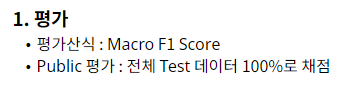

데이콘의 평가 방식이 F1_score_macro 방식이였습니다.